In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec
import spectral_analysis as sa

# Max-No dm15 Match

In [3]:
%matplotlib inline

In [4]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [64]:
comps_host_max, sn_arrays_host_max, og_sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
['-12 SELECT', '123.png.dat', '17.000000', '53.000000', '596RF Multi-plots.py', 'add_maguire_data.py', 'add_ryan_hst_data.py', 'add_ryan_hst_data.pyc', 'add_swift_uv_data.py', 'add_swift_uv_data.pyc', 'Andres_Telluric.ipynb', 'badfiles.txt', 'bootstrap.py', 'build_event_table.py', 'build_event_table.pyc', 'build_kaepora.py', 'build_phot_db', 'build_phot_db.py', 'build_phot_db.pyc', 'build_spectral_table.py', 'build_spectral_table.pyc', 'Carbon_EW.ipynb', 'check.py', 'checked_csp_0-11', 'checked_other_0-0', 'checked_other_0-7', 'checkUI.py', 'Color_dm15.ipynb', 'composite plot.png', 'composite.py', 'composite.pyc', 'composite_conflicts.py', 'createdb.py', 'cross_correlate.py', 'database_revisions.txt', 'datafidelity.py', 'datafidelity.pyc', 'data_notes.txt', 'data_notes_csp_other.txt', 'db_maintenance.py', 'db_maintenance.pyc', 'debug_failed_spectr

composite.py:1215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1252: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


KeyboardInterrupt: 

In [6]:
dmlate = []
dmearly = []
for s in sn_arrays_host_max[0]:
    dmlate.append(np.nanmean(s.dm15_array))
for s in sn_arrays_host_max[1]:
    dmearly.append(np.nanmean(s.dm15_array))
print np.average(dmlate), np.average(dmearly)

1.09776143037 1.47312882951


Phase:  0.297864602844
dm15:  1.09226591033
Redshift:  0.0129290910405
Morphology:  12.5901458103
Phase:  0.0436236985333
dm15:  1.3746852981
Redshift:  0.0120101524127
Morphology:  5.2103955279


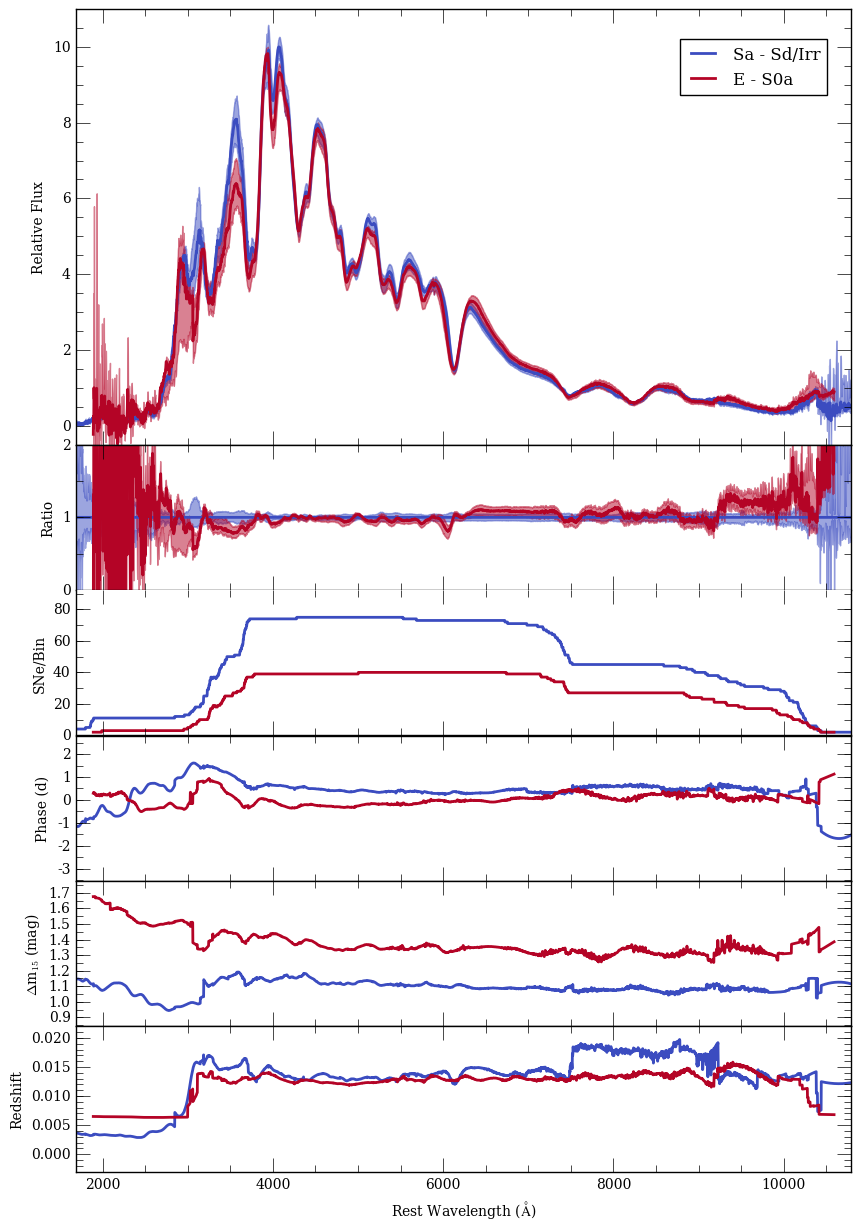

In [7]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Mid dm15 Matched

In [8]:
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]
query_host_match_p0 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'",
                       "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [9]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_match_p0, sn_arrays_match_p0, boot_sn_arrays_match_p0 = query_db.main(len(query_host_match_p0), query_host_match_p0, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'
74 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 70, 'spectra left')
(0, 'Peculiar Ias removed', 70, 'spectra left')
57 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
16 total SNe
removed SNe without host corrections
Using 46 spectra of 15 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
60 Total Spectra found
105 questionable files currently

Phase:  0.59440619277
dm15:  1.30330526748
Redshift:  0.017807316828
Morphology:  11.3600343101
Phase:  0.391655432465
dm15:  1.29166966763
Redshift:  0.0154304342108
Morphology:  6.6204458155


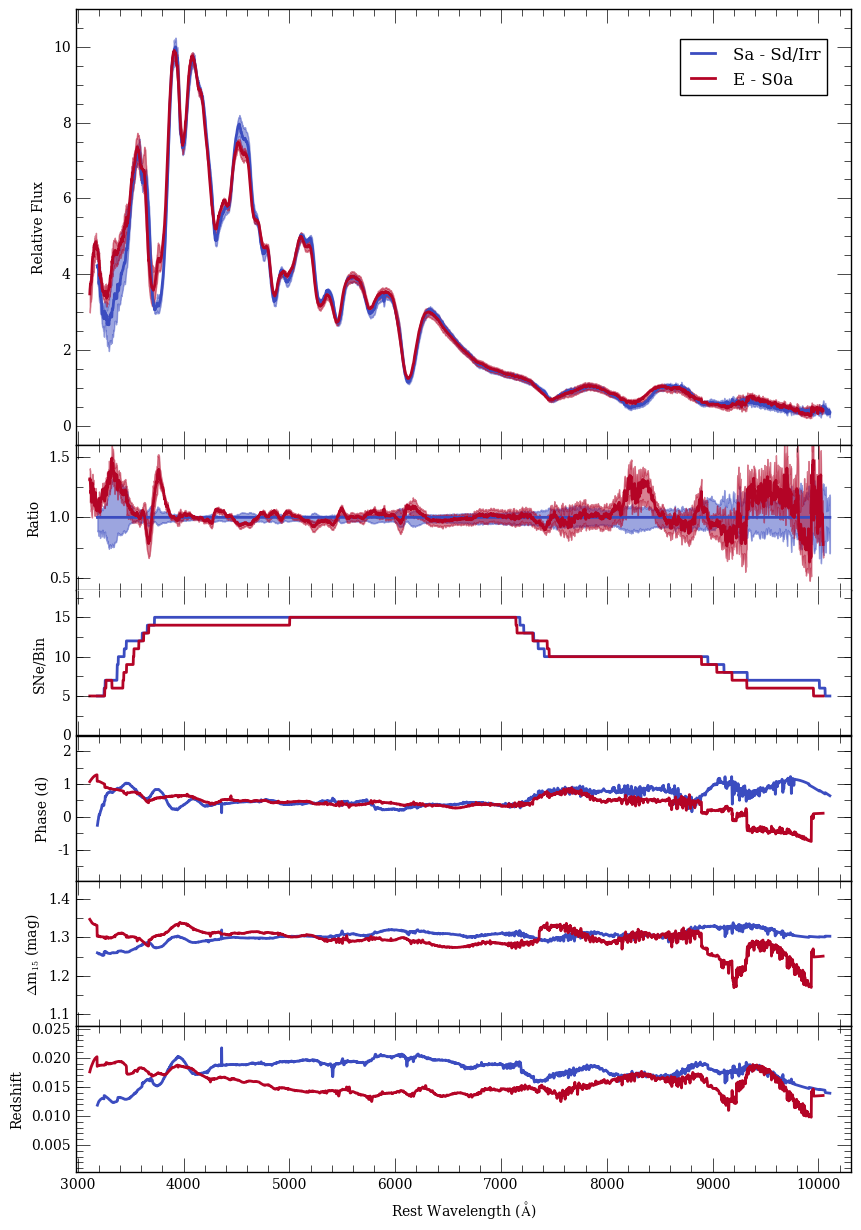

In [10]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_match_p0, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_max')
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_max_dm13')
query_db.comparison_plot(comps_host_match_p0, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [11]:
# diff_p0, err_p0, means_p0, varis_p0, EWs_p0 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=7600., w2=8200., w3=9000.)

In [12]:
# diff_p0_hk, err_p0_hk, means_p0_hk, varis_p0_hk, EWs_p0_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=3400., w2=3700., w3=4000.)

In [13]:
# query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp' and Supernovae.SN != '2008hv' and Supernovae.SN != '2002dj' and Supernovae.SN != '1994d'"]
query_host_match_m3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))"]

In [14]:
comps_host_match_m3, sn_arrays_match_m3, og_sn_arrays_match_m3, boot_sn_arrays_match_m3 = query_db.main(len(query_host_match_m3), query_host_match_m3, boot='b', medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
67 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 65, 'spectra left')
(0, 'Peculiar Ias removed', 65, 'spectra left')
51 valid spectra found
Arrays cleaned
8 spectra may have telluric contamination
13 total SNe
removed SNe without host corrections
Using 40 spectra of 12 SNe
Gini balancing...
Balanced after 5 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))
ERROR:  sn1992a-19920116.220-iue.flm None
46 Total 

Phase:  -2.50965508628
dm15:  1.27850245814
Redshift:  0.0157083439953
Morphology:  11.4030648117
Phase:  -2.84731975869
dm15:  1.28993268129
Redshift:  0.0121942608187
Morphology:  5.70688907236


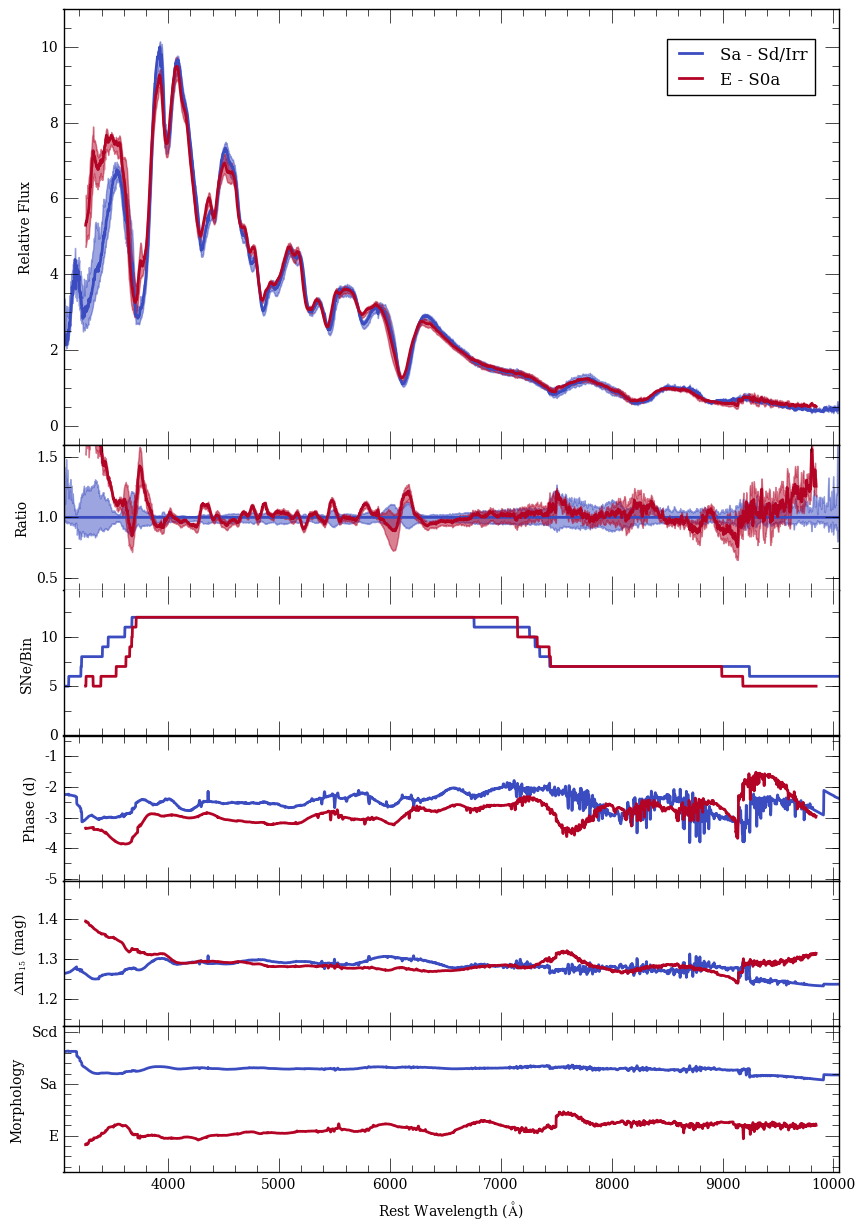

In [15]:
query_db.set_min_num_spec(comps_host_match_m3, 1)
# query_db.comparison_plot(comps_host_mid_dm15_m1week, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, savename='host_composites_updated/host_m3_dm13')
query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, morph=True, savename='host_composites_updated/host_m3_dm13')

In [16]:
# diff_m3, err_m3, means_m3, varis_m3, EWs_m3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=7600., w2=8200., w3=9000.)

In [17]:
# diff_m3_hk, err_m3_hk, means_m3_hk, varis_m3_hk, EWs_m3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=3400., w2=3700., w3=4000.)

In [18]:
# query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_match_p3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [19]:
comps_host_match_p3, sn_arrays_match_p3, og_sn_arrays_match_p3, boot_sn_arrays_match_p3 = query_db.main(len(query_match_p3), query_match_p3, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
58 Total Spectra found
105 questionable files currently ignored
(2, 'questionable spectra removed', 56, 'spectra left')
(0, 'Peculiar Ias removed', 56, 'spectra left')
47 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
13 total SNe
removed SNe without host corrections
Using 42 spectra of 12 SNe
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
68 Total Spectra found
105 questionable files currentl

Phase:  2.64976486249
dm15:  1.29757411215
Redshift:  0.0157116243083
Morphology:  10.5983337393
Phase:  2.89162095413
dm15:  1.29572790508
Redshift:  0.0141120457277
Morphology:  7.11412439248


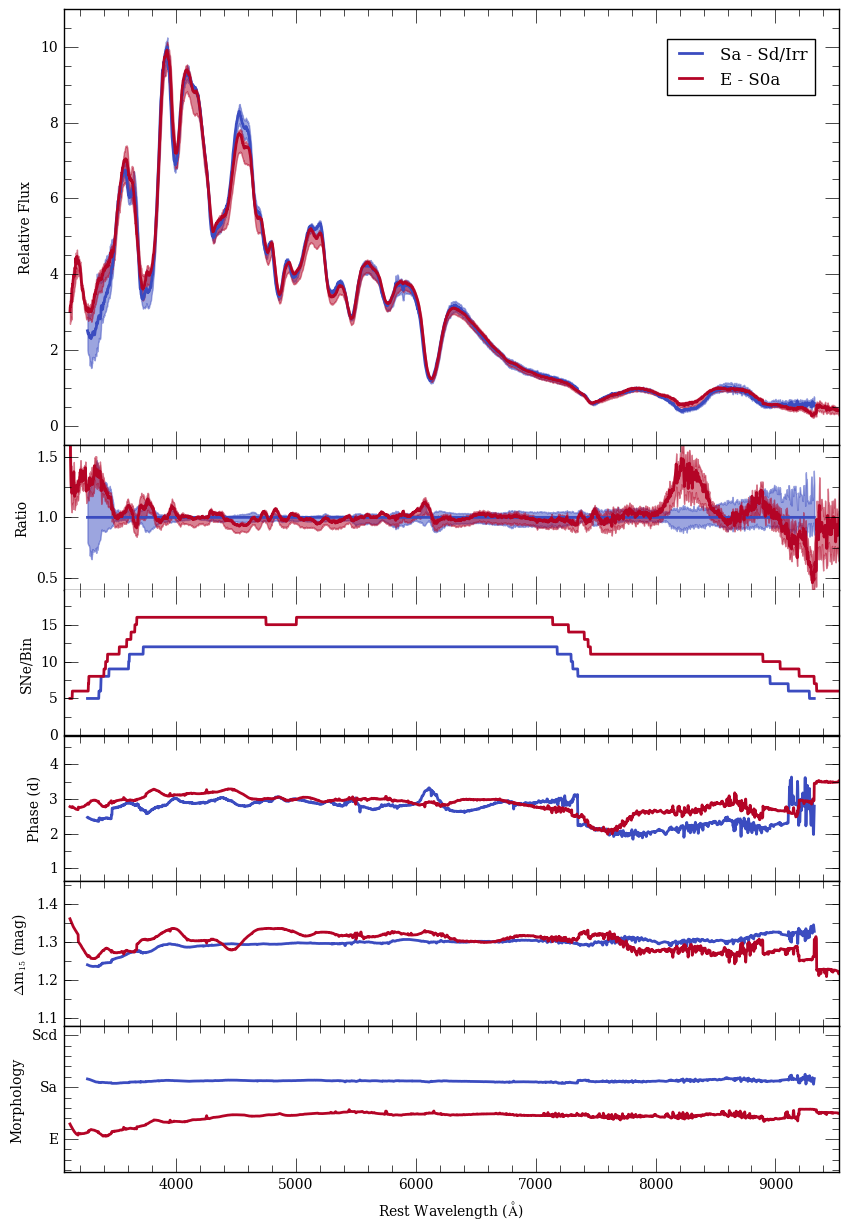

In [20]:
query_db.set_min_num_spec(comps_host_match_p3, 1)
# query_db.comparison_plot(comps_host_mid_dm15_p1week, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p3_dm13')
query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p3_dm13')

In [21]:
# diff_p3, err_p3, means_p3, varis_p3, EWs_p3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=7600., w2=8200., w3=9000.)

In [22]:
# diff_p3_hk, err_p3_hk, means_p3_hk, varis_p3_hk, EWs_p3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=3400., w2=3700., w3=4000.)

In [23]:
# query_host_mid_dm15_pmore = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host >= 10 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Supernovae.SN != '2007bc' and Supernovae.SN != '2002er' and Supernovae.SN != '1996z' and Supernovae.SN != '2003cg'",
#                              "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45)) and Supernovae.SN != '1997bp' and Supernovae.SN != '1999ac'"]
query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))"]

In [24]:
comps_host_match_p8, sn_arrays_match_p8, og_sn_arrays_match_p8, boot_sn_arrays_match_p8 = query_db.main(len(query_host_match_p8), query_host_match_p8, boot='b', medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'
56 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 55, 'spectra left')
(0, 'Peculiar Ias removed', 55, 'spectra left')
51 valid spectra found
Arrays cleaned
6 spectra may have telluric contamination
16 total SNe
removed SNe without host corrections
Using 34 spectra of 13 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))
36 Total Spectra found
105 questionable files c

Phase:  8.23799611862
dm15:  1.27115890022
Redshift:  0.0135329186425
Morphology:  11.0137140437
Phase:  8.18050644547
dm15:  1.26284227754
Redshift:  0.0149802062956
Morphology:  6.86279387202


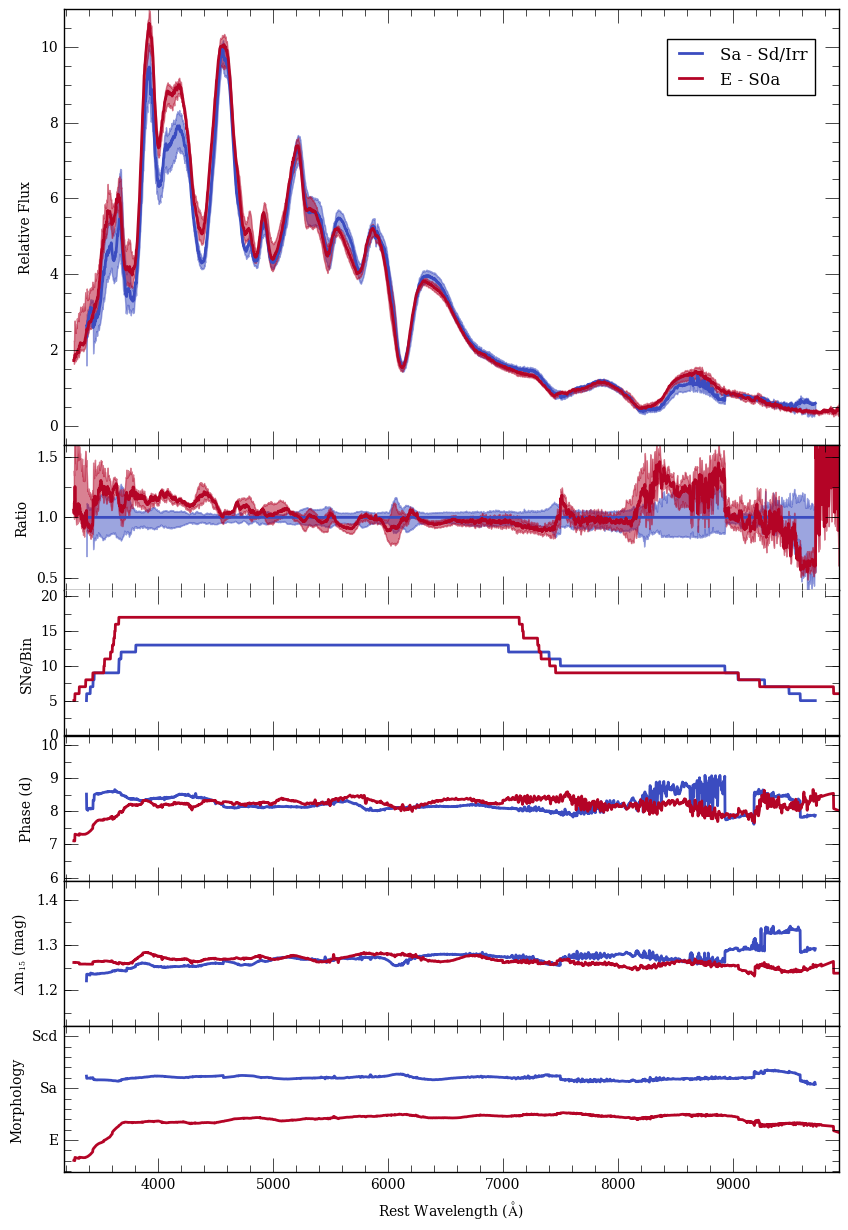

In [25]:
query_db.set_min_num_spec(comps_host_match_p8, 1)
# query_db.comparison_plot(comps_host_mid_dm15_pmore, scale_type= False, min_num_show=7, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_p9_dm13')
query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p9_dm13')

In [26]:
# diff_p8, err_p8, means_p8, varis_p8, EWs_p8 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=7600., w2=8200., w3=9000.)

In [27]:
# diff_p8_hk, err_p8_hk, means_p8_hk, varis_p8_hk, EWs_p8_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=3400., w2=3700., w3=4000.)

In [28]:
# plt.plot(boot_sn_arrays_match_p8[1][8].wavelength, boot_sn_arrays_match_p8[1][8].flux)
# plt.show()

In [29]:
# EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
# EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

# mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
# mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

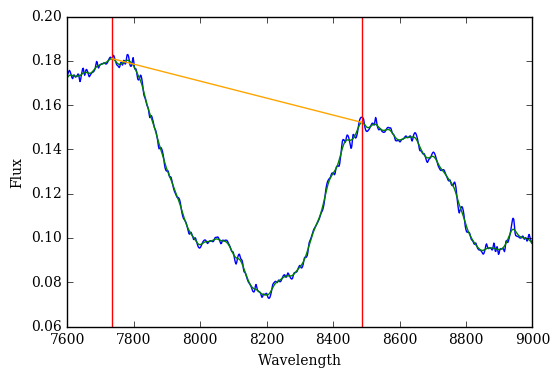

0 228.682378566 7.36027071652 0.921499067881 -4.77607382341


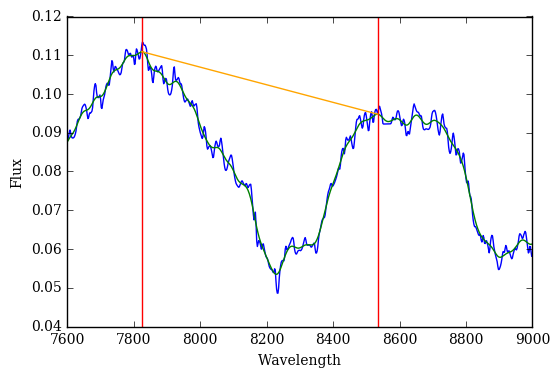

1 148.345369113 3.87504961405 0.719591378332 -0.0433753943234


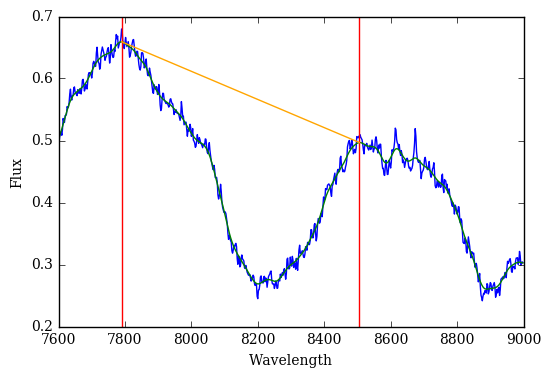

2 180.8280529 7.11753428564 0.973387674197 -5.98898317994


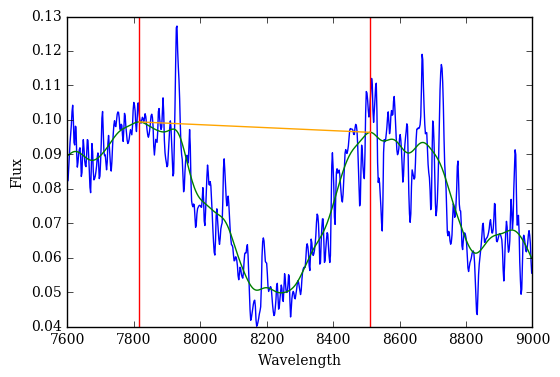

3 172.621012864 4.88010461736 2.59372179129 -1.34909797218


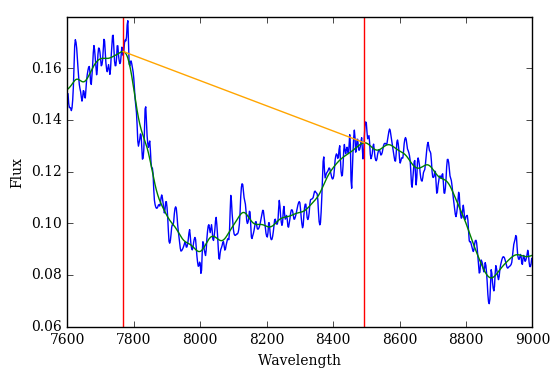

4 188.023055666 10.5464080639 3.23991969568 -5.57234101369


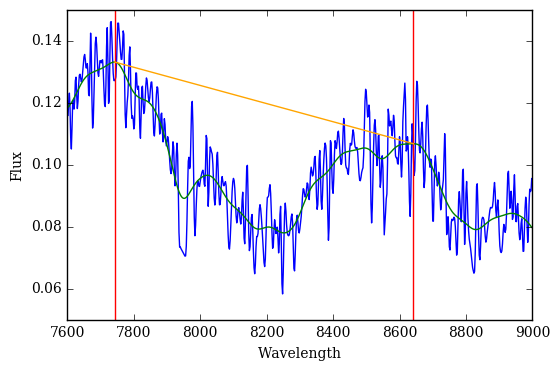

5 159.190018802 6.99301659477 5.33969604758 -5.9374842372


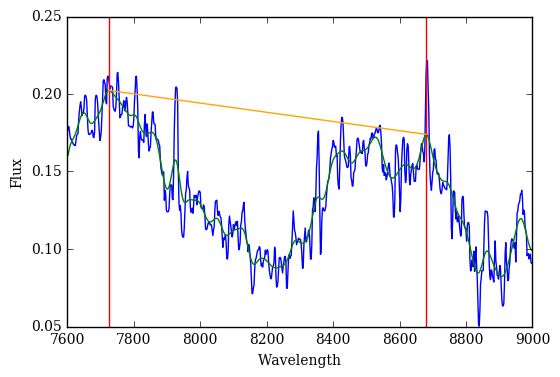

32 244.523598271 23.2725334758 9.28968545827 -5.98372545657


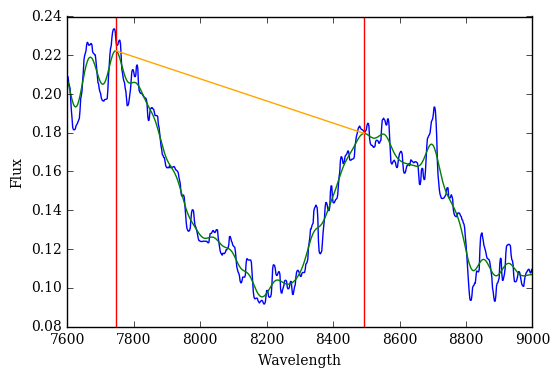

33 219.260974421 11.8859898922 1.19447885515 -4.99222165266


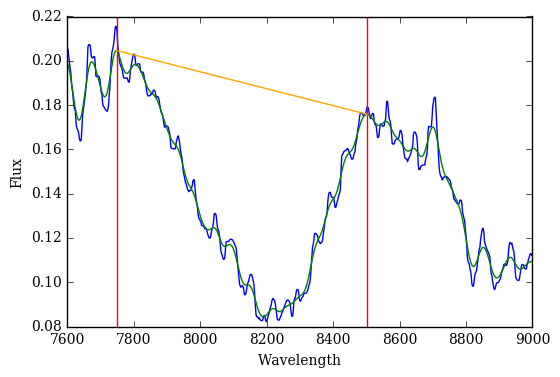

34 217.855065835 13.7637896372 0.525990721102 -4.00071784876


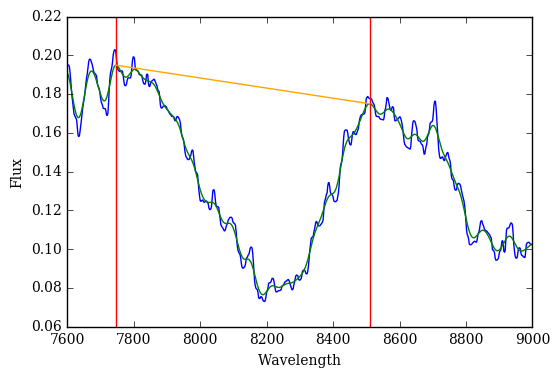

35 216.906009137 12.8420959504 0.667346632633 -3.00921404485


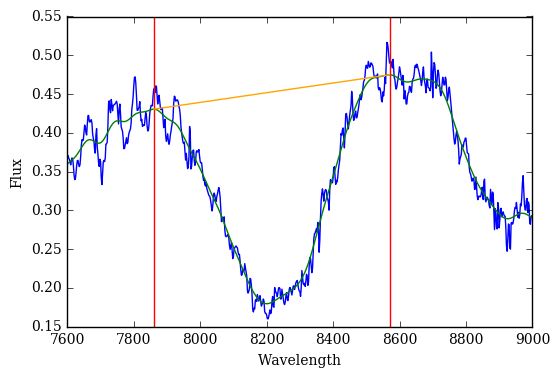

36 207.105256691 3.6296048176 1.20950124948 -1.02620643704


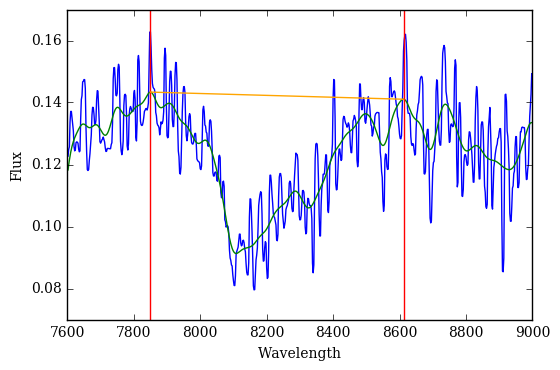

37 121.957968565 8.61804333449 1.6860016237 -0.0347026331401


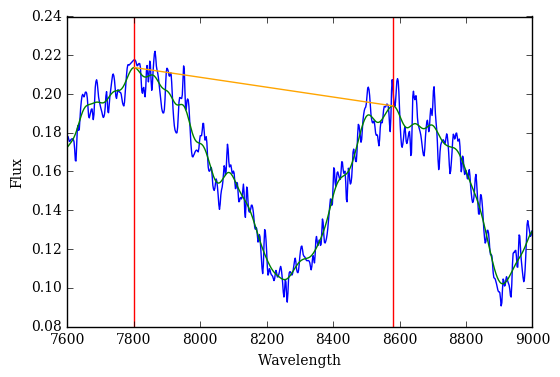

38 169.897183009 7.79069252217 1.61481729588 -2.3


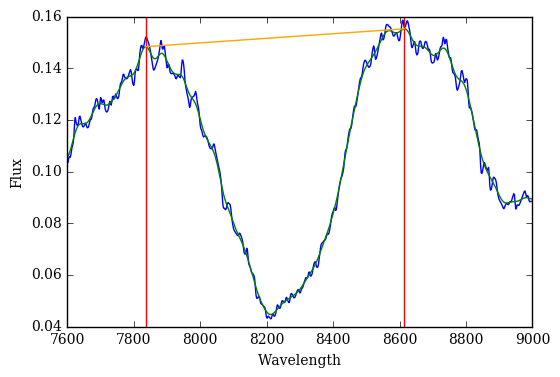

40 256.545292895 8.19070543577 0.62445007313 2.68475189241


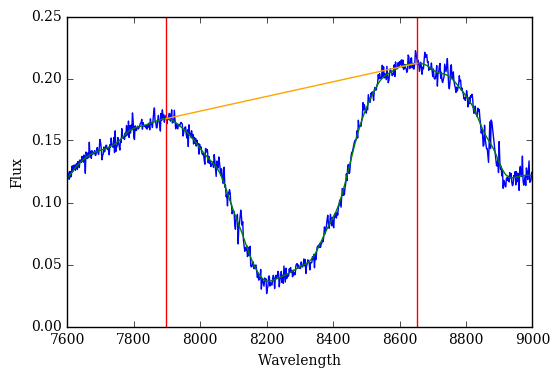

41 288.504122887 5.37029476524 0.897180196244 4.84044973543


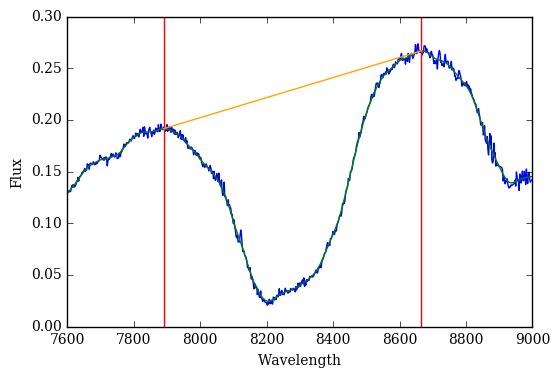

42 324.863641471 6.56178602481 0.547710751483 5.82551679007


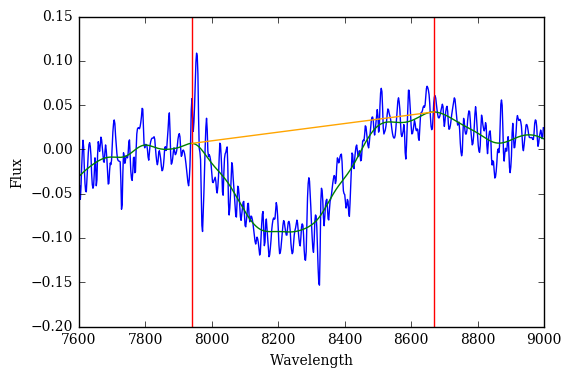

43 2008.80457042 2096.01066588 191.161520101 4.15787297081


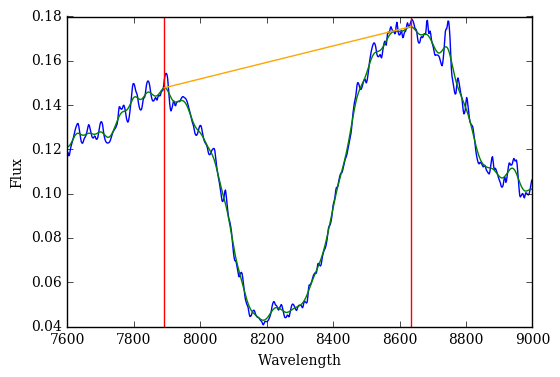

44 262.521017363 5.59693053802 0.872868798768 5.06360992654


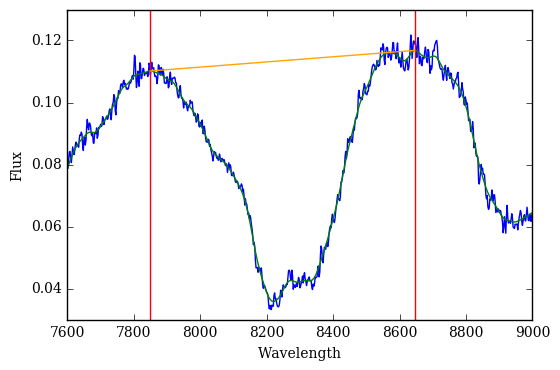

45 233.924486426 3.04260813491 1.0024425087 5.7334384858


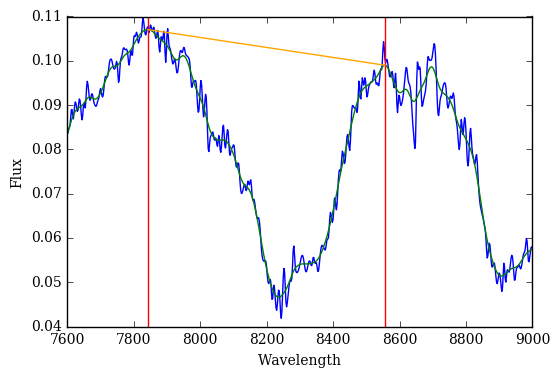

46 175.782245221 6.54496691044 0.838715534554 1.37637147335


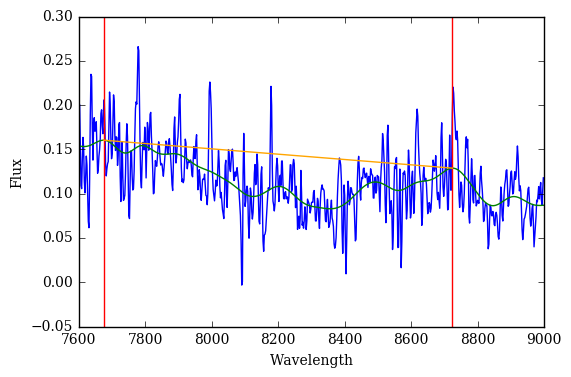

70 208.399515734 19.3365471226 9.94881671247 2.92438784253


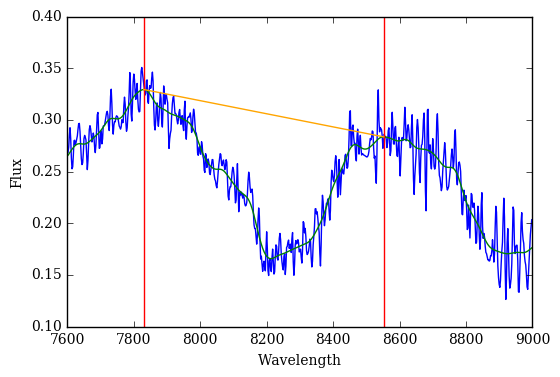

72 148.266892688 6.92481289745 2.72593491603 0.481311692701


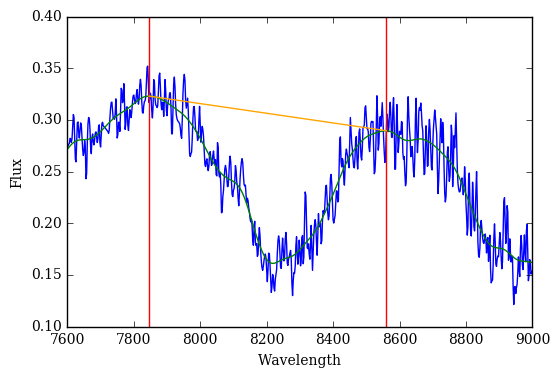

73 148.880815102 3.44468488715 2.50198994666 1.47746908975


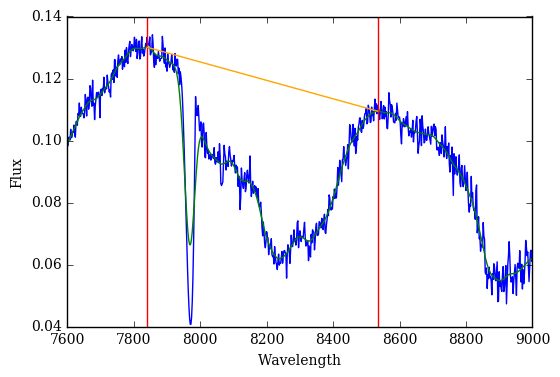

76 172.583663272 4.49108573955 301.004338482 0.197884012651


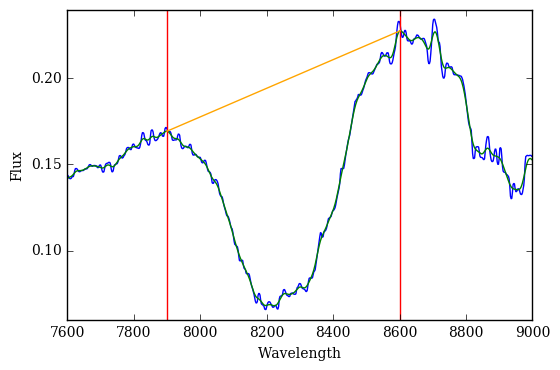

79 233.304192746 6.18307077224 0.315287424249 1.94830497467


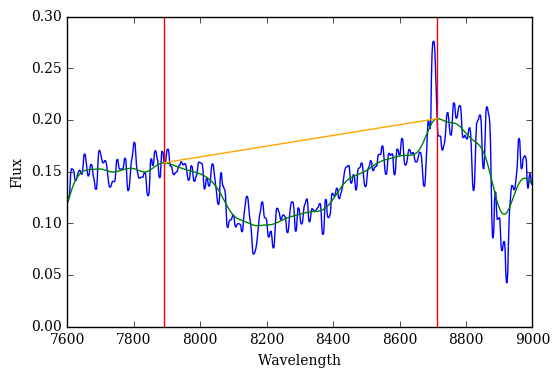

81 200.310114627 13.5783439745 1.80982456953 3.93131258248


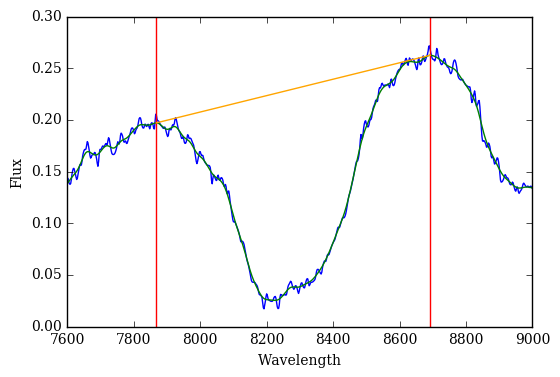

82 336.543352667 6.18391392811 1.07247934312 7.70484311474


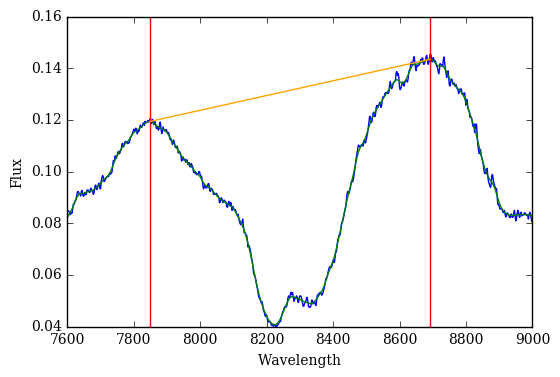

83 257.362703746 4.91942214994 0.637087870016 8.69085173501


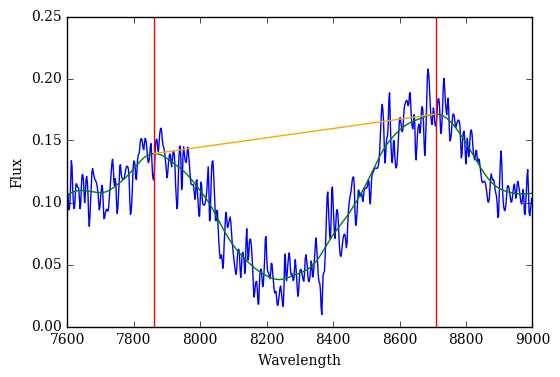

84 317.751305497 6.4439395936 3.22235771778 7.99914644733


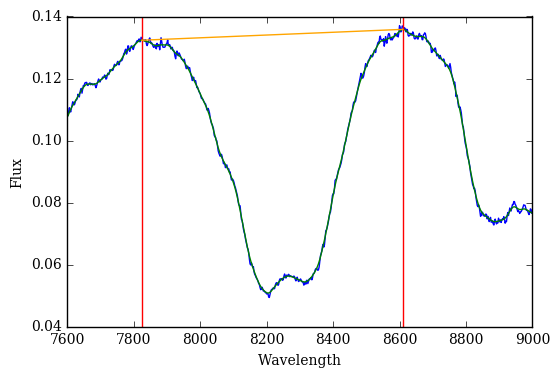

85 222.179002647 3.07346275453 0.384937649127 6.04326425565


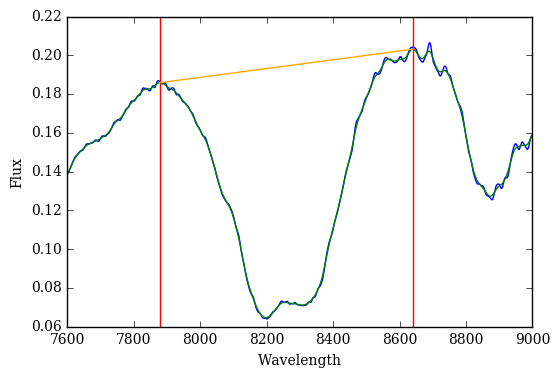

86 243.153589329 3.53399845198 0.259682273213 7.94920919655


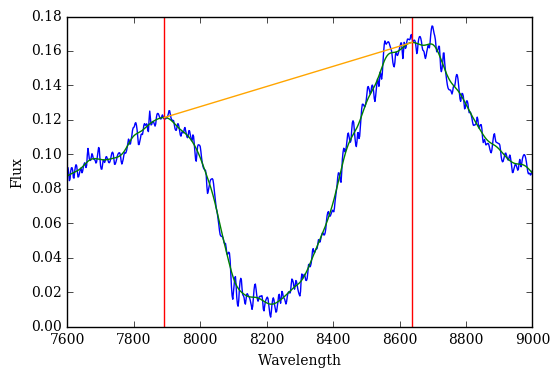

88 342.053647042 3.80496452915 1.62337167242 7.32475422879


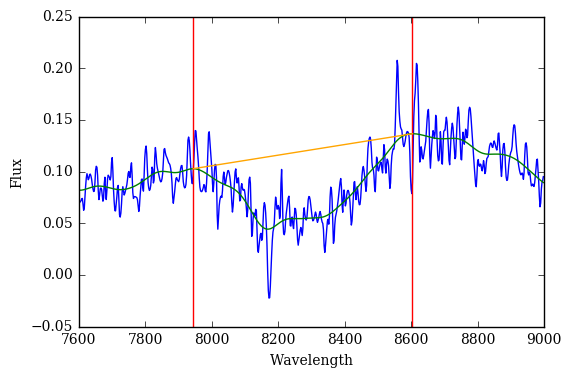

89 222.199881028 5.46489432361 6.73549826074 9.55565385078


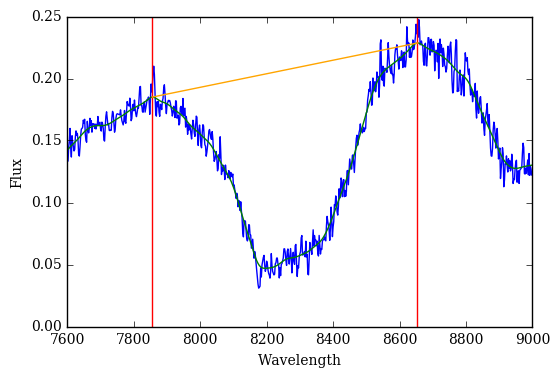

95 301.107355096 4.49854303831 2.00584601612 7.5804759315


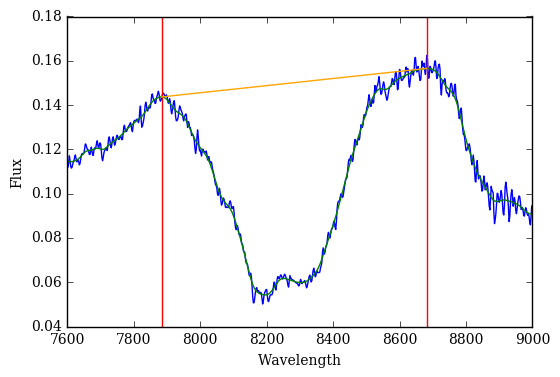

109 238.824984425 5.82914412281 1.02485820919 9.80157734044


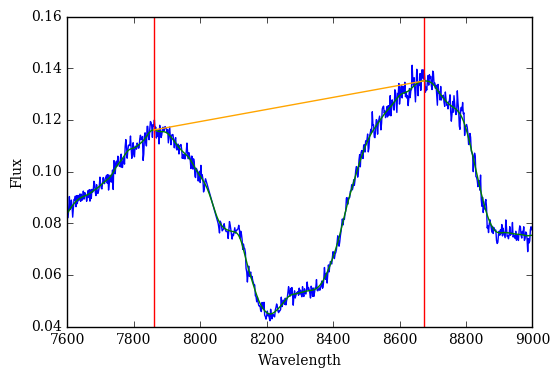

111 246.11542319 4.21999026488 0.717160629887 8.91826359492


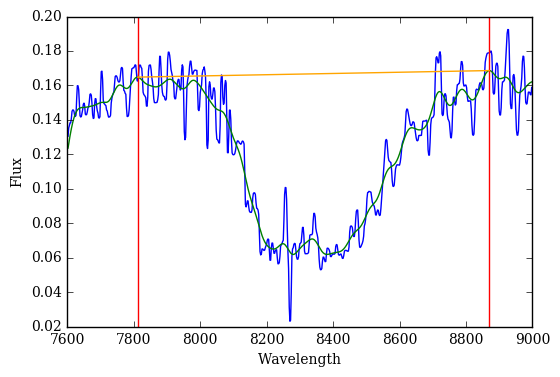

113 308.005822462 13.6051967902 1.73883858967 9.8803354059


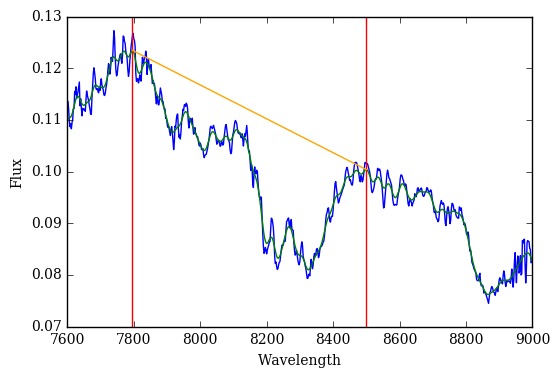

1 72.3123319332 3.92781278675 1.65811497939 -4.11852407745


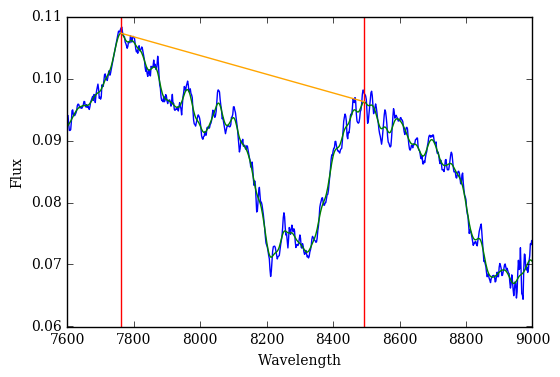

2 90.3147754266 9.52858105563 0.716208687147 -3.57863516883


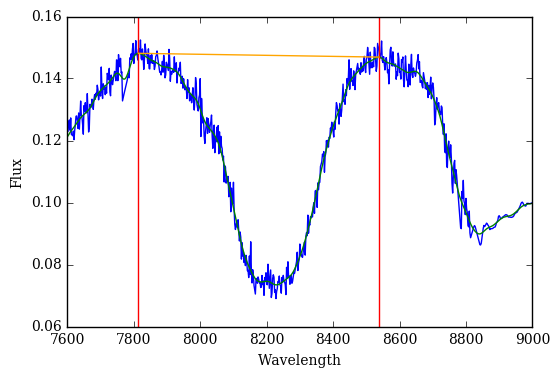

3 158.725951174 5.75773964233 0.47866434145 -1.26102420152


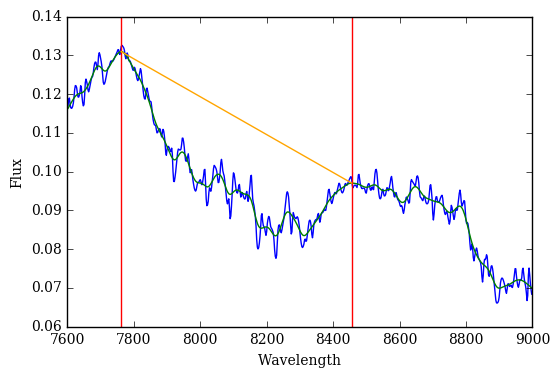

4 94.8163706839 7.42374355503 1.17332292759 -4.49596515947


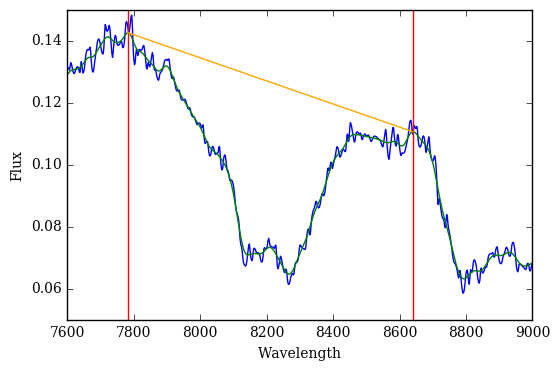

5 170.367239241 8.21907783421 9.6028247352 -0.175412464277


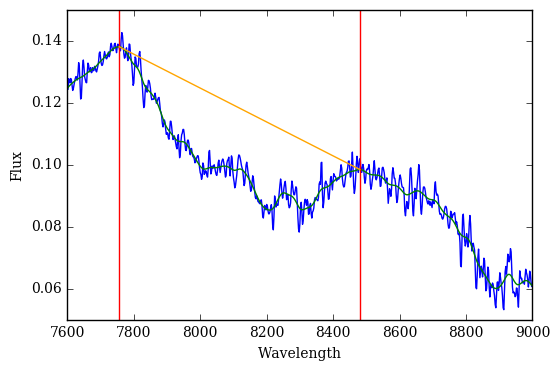

26 101.639799433 6.33388660576 2.46893637956 -4.66937955106


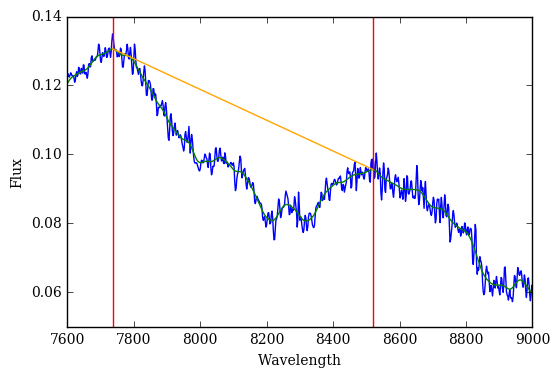

27 101.453234099 4.82174962706 1.80521136644 -3.66436432802


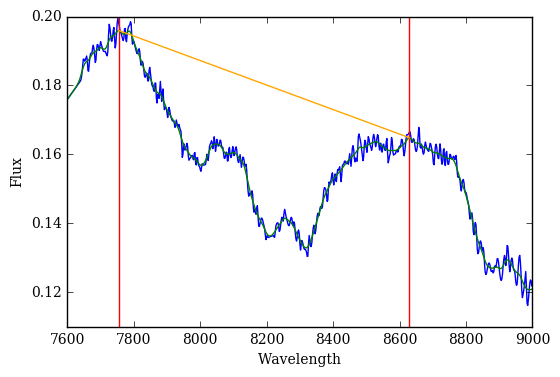

29 102.350449939 6.22159757327 1.02633728702 -5.57452762216


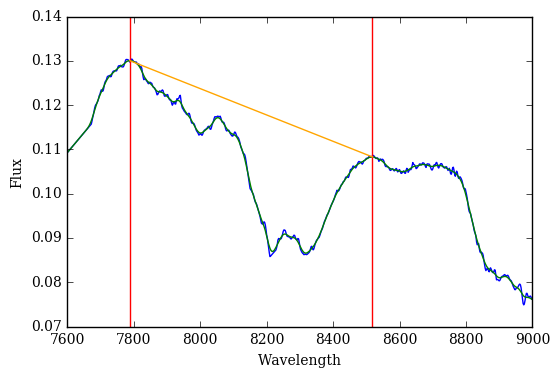

30 75.9805624803 4.02082272362 0.264855051031 -4.57658139549


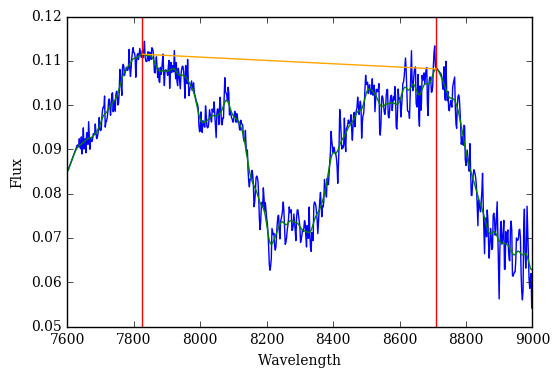

31 127.877636664 8.48036891163 1.56020088682 -2.58068894216


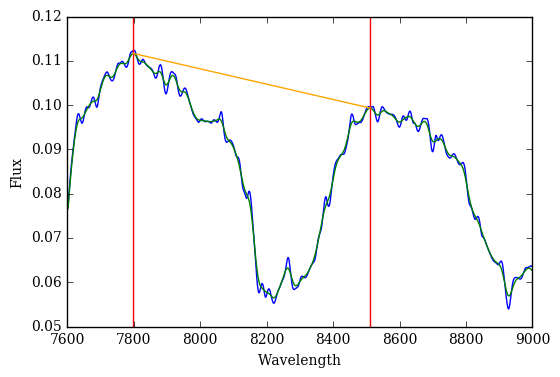

33 132.34124506 4.70912049418 0.637797640955 -1.89285412808


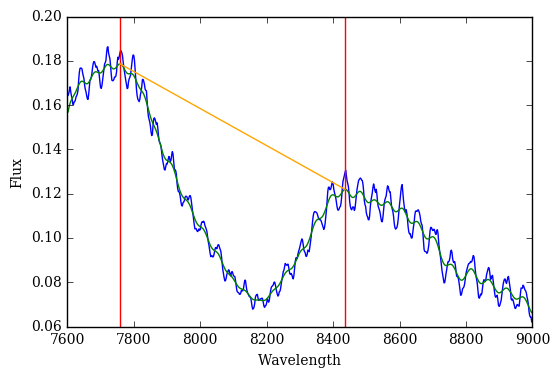

36 183.82768585 6.84944733664 2.42595210289 -5.41810771424


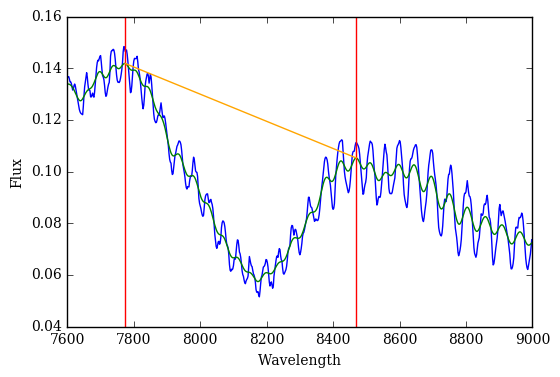

37 184.935132391 6.43933342982 3.20196089611 -4.42741330681


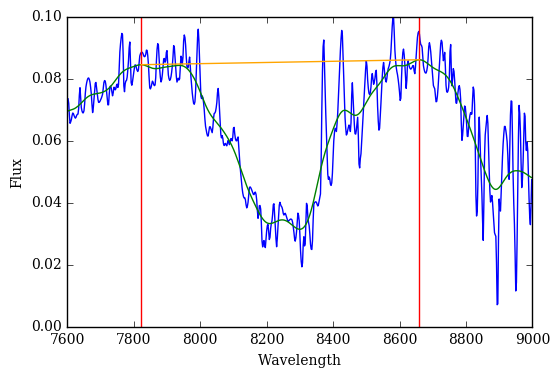

40 209.839289354 4.70783051452 2.85455805598 4.7115224089


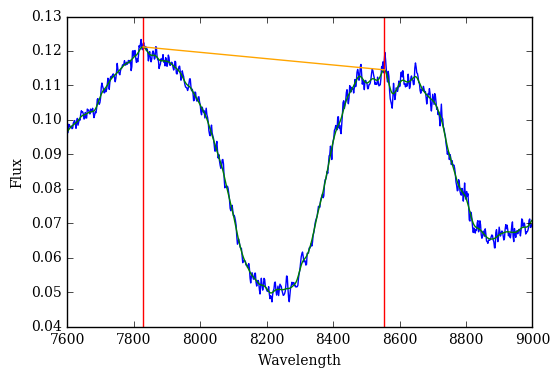

41 187.450350265 6.20628679698 0.865441153336 0.0575854705037


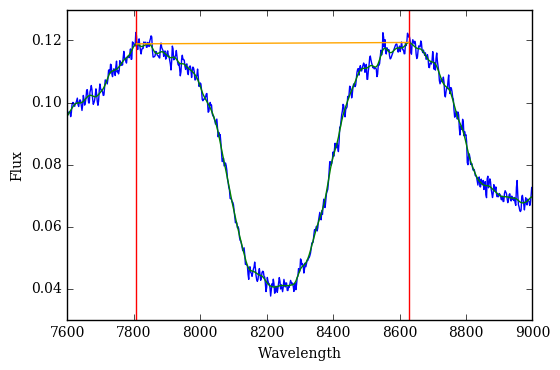

42 225.29167149 5.75016029435 1.10358946448 2.98566024182


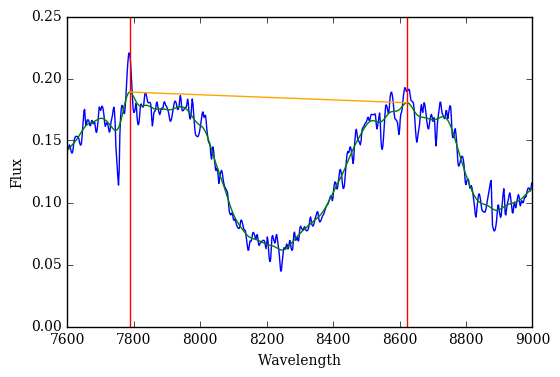

43 253.251893419 19.6680386378 2.16716625456 1.41616176363


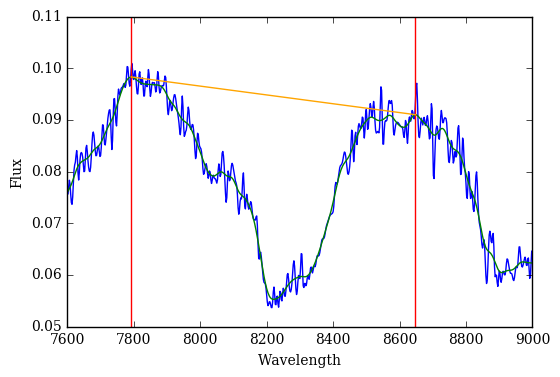

44 134.566062648 7.93159648846 1.39275948933 3.42394892158


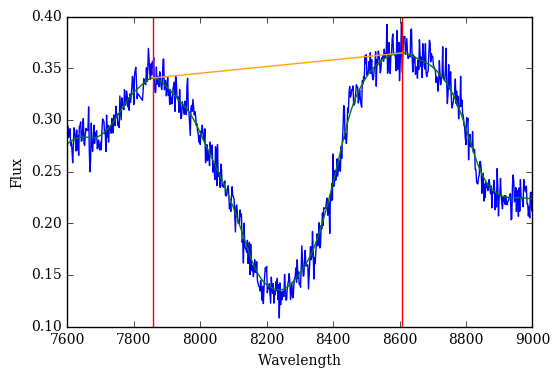

46 214.399512204 3.09423397118 20.2211513666 0.663105336289


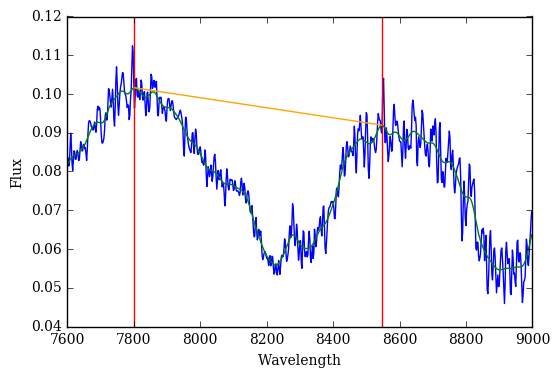

85 141.425460863 6.34906449579 2.30502607422 4.25752037115


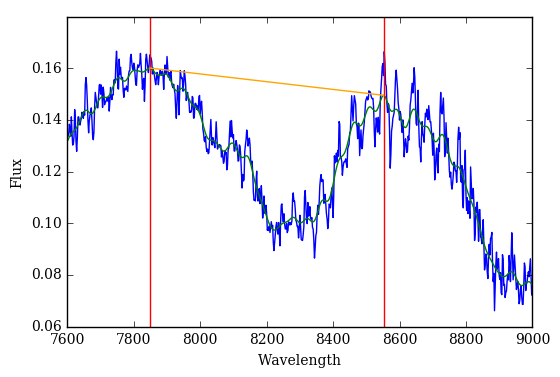

86 125.722817335 4.03051247058 2.18386561926 1.649302898


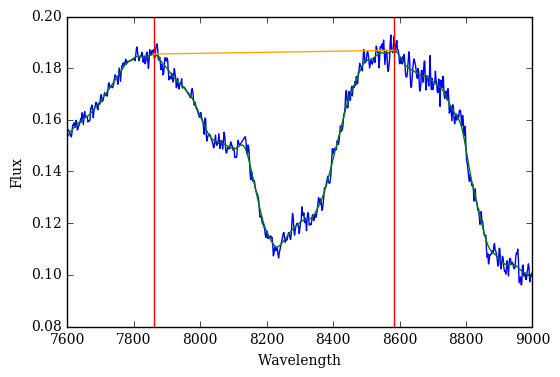

87 132.463563815 5.37960869909 0.680408428296 1.67893109357


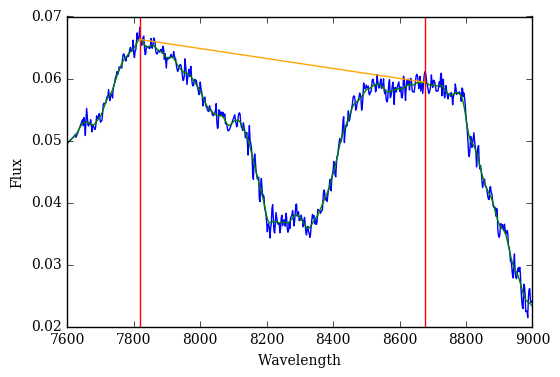

88 144.059341057 6.58437010088 1.06355154034 1.4110959645


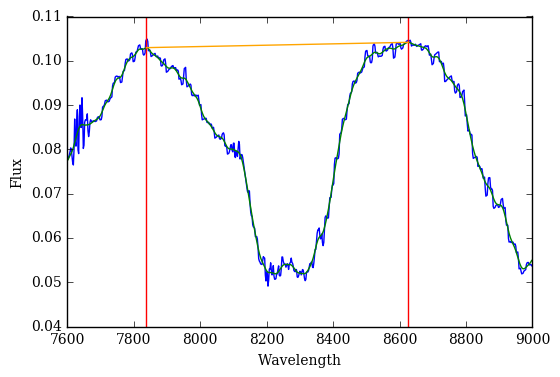

91 170.469139552 2.6983061186 0.626564988182 3.40698841783


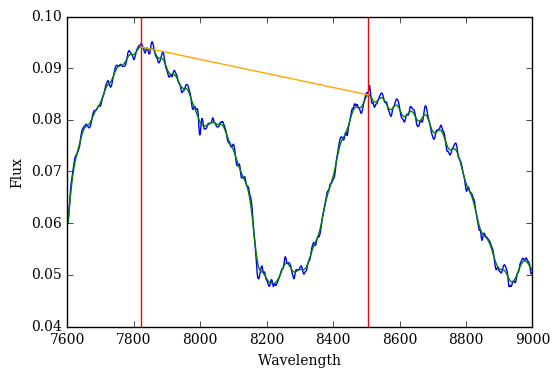

94 137.334329267 4.63309112936 0.483068055462 0.0933516726309


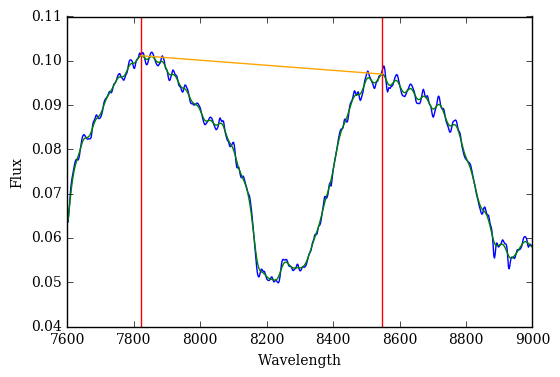

95 150.68827758 4.27418173868 0.506319985568 1.08645457299


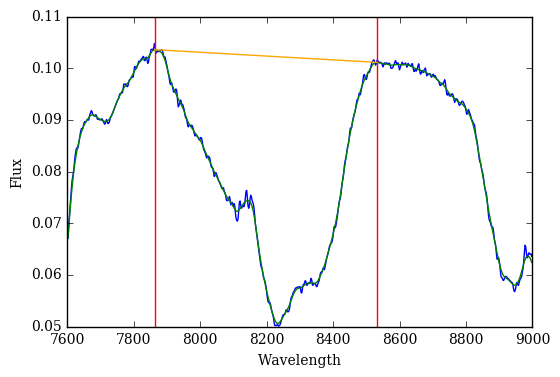

97 170.778999067 5.1878491791 0.235532195672 3.64842750986


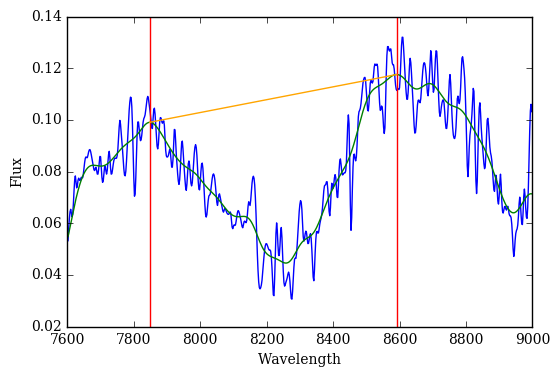

98 226.75558971 7.57847617674 2.65303346081 3.64842750986


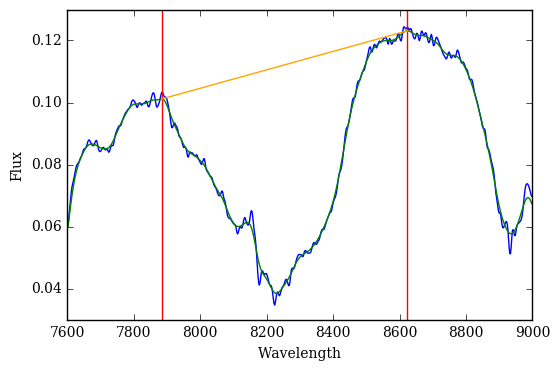

100 231.787104849 9.01007350247 0.498422208074 5.63558846294


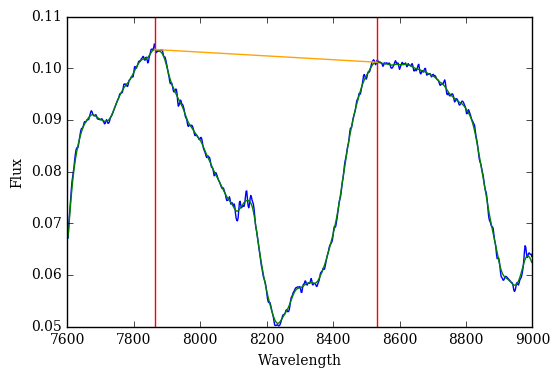

104 170.696784772 5.39258290476 0.259454881484 4.6420079864


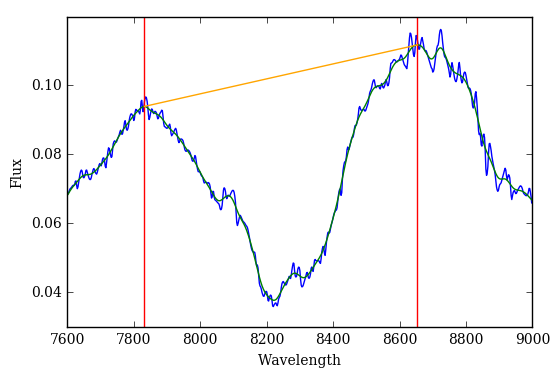

105 239.126889997 5.84971902864 0.649990114434 10.2994354179


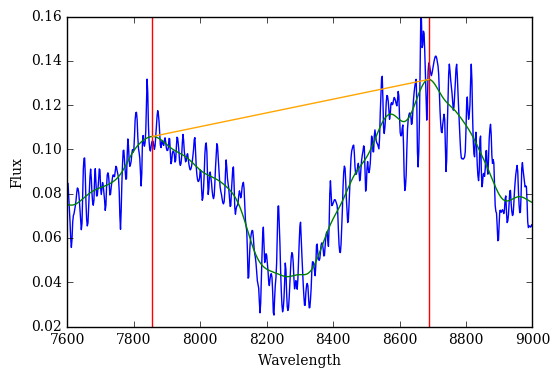

106 255.248469358 10.5600022592 3.33780296232 8.21913507266


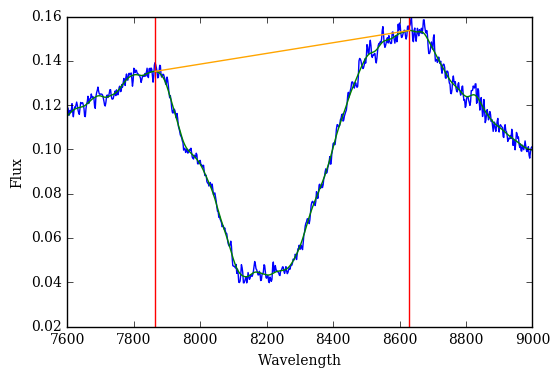

107 273.80461986 8.1302000105 0.717388400193 7.20517073505


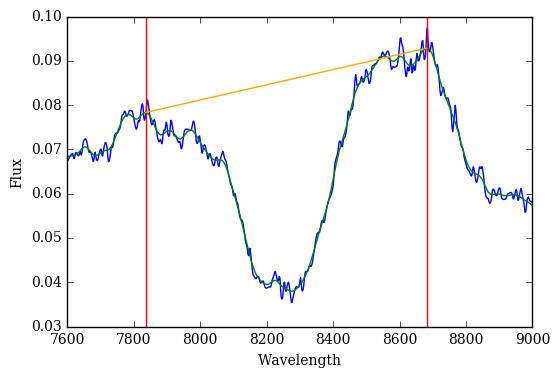

108 185.775747319 12.4985781244 0.947488120444 6.26386430128


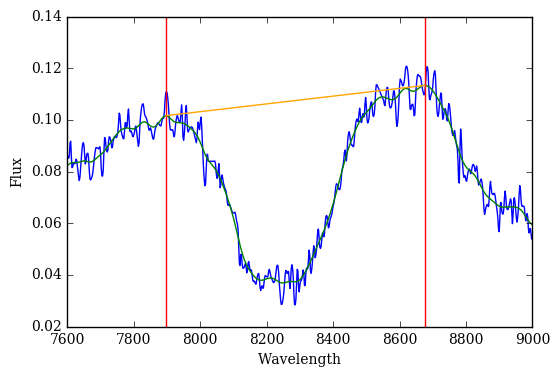

109 228.516945988 7.53167746557 2.10385873075 8.61284999197


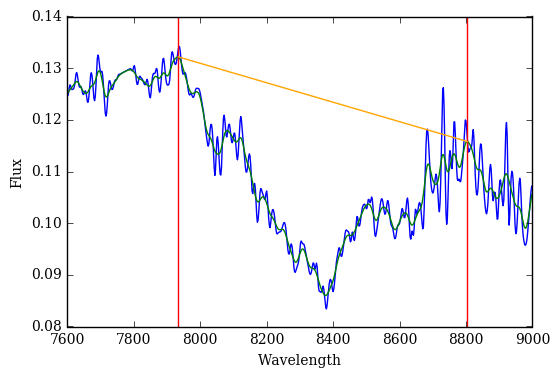

121 130.076463602 8.89526531168 1.33123046062 6.15873694853


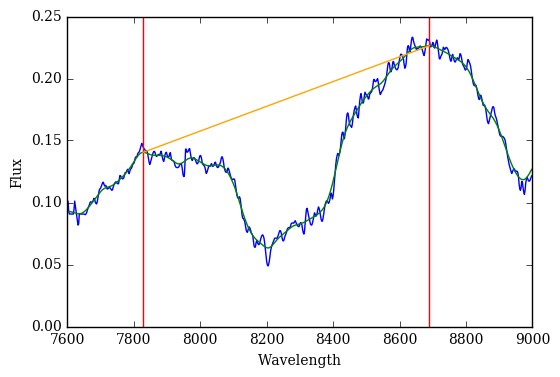

130 227.34617943 7.78532960375 1.45169220149 9.39466577783


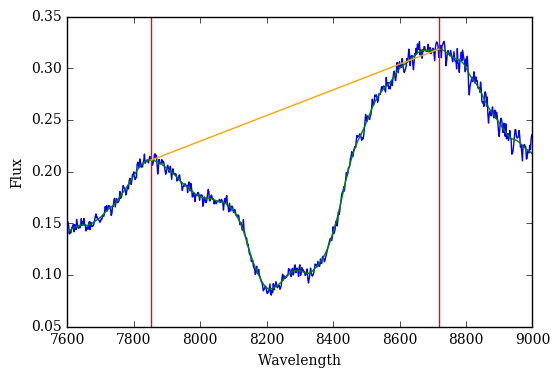

131 252.735168937 7.90321648421 1.37792593676 9.39466577783


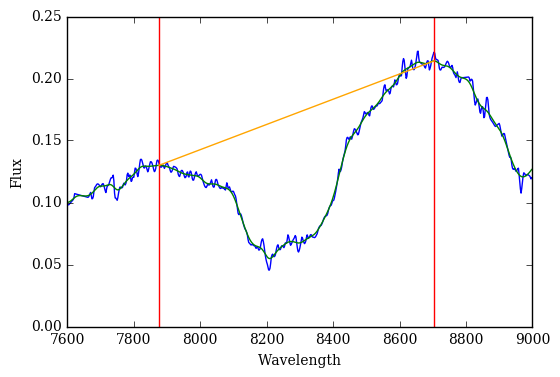

132 231.785153745 8.0338435459 2.05807563482 10.3926120045


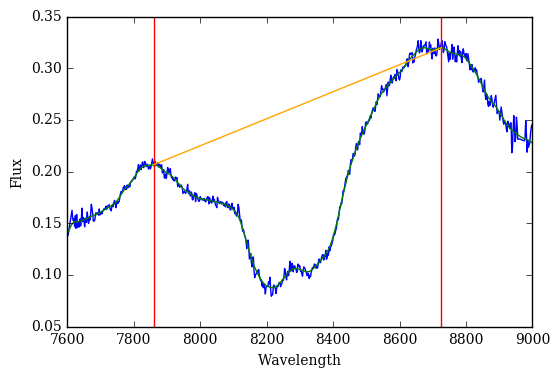

133 250.641799151 9.82691310841 3.20124427367 10.3926120045


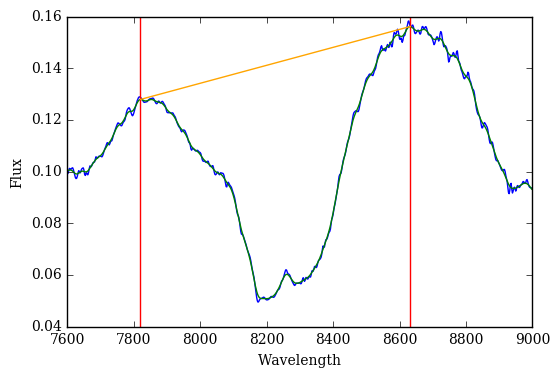

134 239.747784421 3.48734797015 1.15548805947 7.04507197513


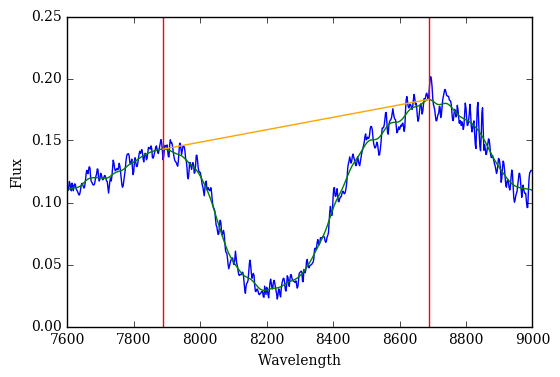

135 308.301420459 5.11140636543 1.43997900875 7.46091958237


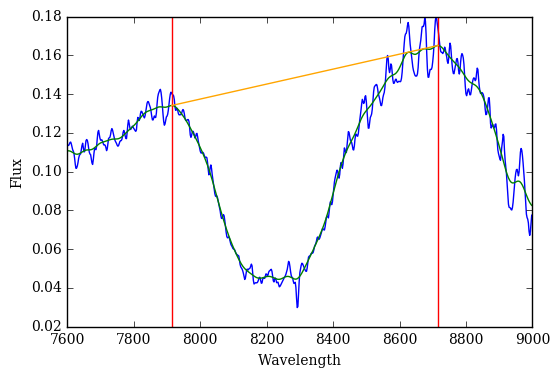

136 273.849272293 7.83667181081 1.21385244024 8.4516139898


In [30]:
EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late, SNs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early, SNs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

In [31]:
obj_list_late = []
for SN in SNs_late:
    obj_list_late.append(SN.name)
obj_set_late = set(obj_list_late)
print obj_set_late

obj_list_early = []
for SN in SNs_early:
    obj_list_early.append(SN.name)
obj_set_early = set(obj_list_early)
print obj_set_early

colors = ['turquoise', 'darkblue', 'green', 'limegreen']
color_dict_late = {}
for i, obj in enumerate(obj_set_late):
    color_dict_late[obj] = colors[i%4]
print color_dict_late

colors = ['darkred', 'pink', 'yellow', 'gold']
color_dict_early = {}
for i, obj in enumerate(obj_set_early):
    color_dict_early[obj] = colors[i%4]
print color_dict_early

set([u'2003cq', u'2007bc', u'2002hw', u'2007bd', u'2005am', u'2006bh', u'2001ep', u'2015f', u'2005bo', u'2004ef', u'2002ha', u'2006ac', u'2002er'])
set([u'2006bq', u'1994d', u'2002dj', u'2008hv', u'2004gs', u'2005w', u'2005cf', u'2006ej', u'1996x', u'1998dx', u'2005ki', u'2003ch', u'2006ef', u'2005el', u'2002he'])
{u'2003cq': 'turquoise', u'2005bo': 'turquoise', u'2001ep': 'green', u'2002hw': 'green', u'2007bd': 'limegreen', u'2005am': 'turquoise', u'2007bc': 'darkblue', u'2015f': 'limegreen', u'2006bh': 'darkblue', u'2004ef': 'darkblue', u'2002ha': 'green', u'2006ac': 'limegreen', u'2002er': 'turquoise'}
{u'2006bq': 'darkred', u'1994d': 'pink', u'2002dj': 'yellow', u'2008hv': 'gold', u'2004gs': 'darkred', u'2005w': 'pink', u'2005cf': 'yellow', u'2006ej': 'gold', u'1996x': 'darkred', u'1998dx': 'pink', u'2005ki': 'yellow', u'2003ch': 'gold', u'2002he': 'yellow', u'2005el': 'pink', u'2006ef': 'darkred'}


In [32]:
# ['E', 'E0', 'E1', 'E2', 'E23', 'E3', 'E6', 'S0', 'S0a', 'Sa', 'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'Sp']
E_E6 = 'darkred'
S0_Sab = '#F000C5'
Sb_Scd = '#1CB700'
irr = '#00AED6'
color_map = {1: 'darkred',   2: 'darkred',    3: 'darkred',    4: 'darkred',    5: 'darkred',     6: 'darkred',
             7:'darkred',    8:'red',    9:'red',    10:'limegreen',   11:'limegreen',    12:'seagreen',   13:'seagreen',    
             14:'darkblue',   15:'darkblue',    16:'black',   17:'black',    18:'black'}
m_colors_late = []
m_colors_early = []
for m in morphs_late:
    m_colors_late.append(color_map[int(m)])
for m in morphs_early:
    m_colors_early.append(color_map[int(m)])
print morphs_late
print m_colors_late
print morphs_early
print m_colors_early

[10.0, 11.0, 14.0, 13.0, 12.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 13.0, 12.0, 12.0, 12.0, 10.0, 11.0, 10.0, 12.0, 11.0, 11.0, 10.0, 10.0, 12.0, 11.0, 12.0, 10.0, 10.0, 12.0, 10.0, 12.0, 10.0, 12.0, 10.0]
['limegreen', 'limegreen', 'darkblue', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'seagreen', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen']
[8.0, 8.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0, 4.0, 1.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 2.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0]
['red', 'red', 'darkred', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 

In [33]:
phases_tot = np.concatenate((phases_late, phases_early))
EWs_tot = np.concatenate((EWs_late, EWs_early))
errs_tot = np.concatenate((err_late, err_early))
SNs_tot = EW_spec_list_late + EW_spec_list_early

avg_phase_late = np.average(phases_late)
avg_EW_late = np.average(EWs_late)
avg_phase_early = np.average(phases_early)
avg_EW_early = np.average(EWs_early)
print avg_phase_late, avg_EW_late
print avg_phase_early, avg_EW_early

avg_phase = np.average(phases_tot)
avg_EW = np.average(EWs_tot)

phases_late_new = phases_late - avg_phase_late
phases_early_new = phases_early - avg_phase_early
EWs_late_new = EWs_late - avg_EW_late
EWs_early_new = EWs_early - avg_EW_early

phases_tot_new = phases_tot - avg_phase
EWs_tot_new = EWs_tot - avg_EW
print avg_phase, avg_EW
# phases_late = phases_late + avg_phase
# phases_early = phases_early + avg_phase
# EWs_late = EWs_late + avg_EW
# EWs_early = EWs_early + avg_EW

2.36346159696 228.337009947
2.49474316563 179.55531433
2.43583476943 201.444536722


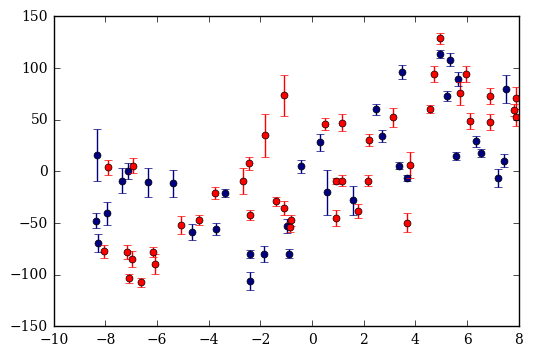

In [34]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

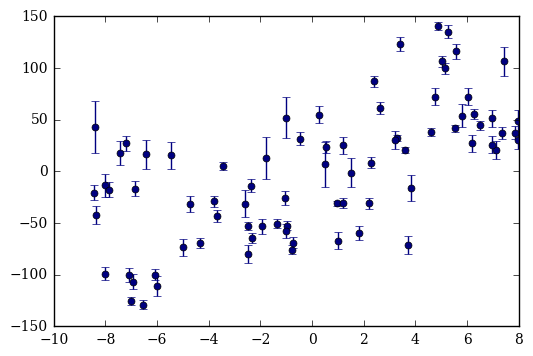

In [35]:
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.show()

In [36]:
from scipy.optimize import curve_fit
from scipy.special import erf

In [37]:
def lin(x, A, B):
    return A + B*x

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [38]:
x = np.linspace(-10,14,1000)

In [39]:
popt2_late, pcov2_late = curve_fit(lin, phases_late, EWs_late, p0=None, sigma=err_late, absolute_sigma=True)
popt2_early, pcov2_early = curve_fit(lin, phases_early, EWs_early, p0=None, sigma=err_early, absolute_sigma=True)

popt2_tot, pcov2_tot = curve_fit(lin, phases_tot_new, EWs_tot_new, p0=None, sigma=errs_tot, absolute_sigma=True)

In [40]:
y_late = popt2_late[0] + popt2_late[1]*x
y_early = popt2_early[0] + popt2_early[1]*x
y_tot = popt2_tot[0] + popt2_tot[1]*x

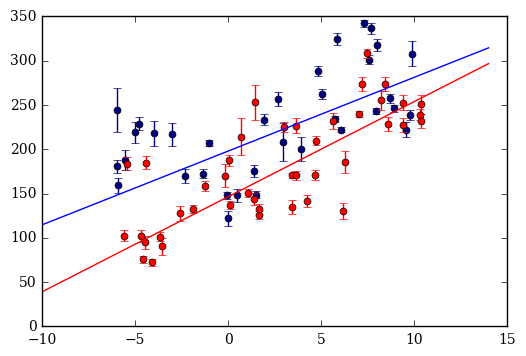

In [41]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(x,y,'g')
plt.plot(x,y_late,'b')
plt.plot(x,y_early,'r')
# plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

-9.04026822233 10.7660816342


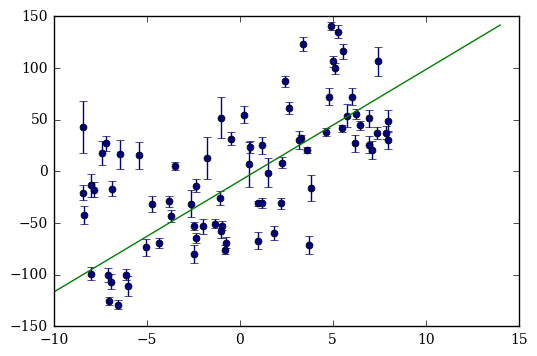

In [42]:
print popt2_tot[0], popt2_tot[1]
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [43]:
ints_tot = []
slopes_tot = []
for i in range(1000):
    strap_list = np.random.random_sample(len(EWs_tot_new))
    strap_list *= len(EWs_tot_new)
    strap_list = strap_list.astype(int)
    new_phases_tot = []
    new_EWs_tot = []
    new_errs_tot = []
    for i in strap_list:
        new_phases_tot.append(phases_tot_new[i])
        new_EWs_tot.append(EWs_tot_new[i])
        new_errs_tot.append(errs_tot[i])
    
    popt2_tot, pcov2_tot = curve_fit(lin, new_phases_tot, new_EWs_tot, p0=None, sigma=new_errs_tot, absolute_sigma=True)
    ints_tot.append(popt2_tot[0])
    slopes_tot.append(popt2_tot[1])
    
#     plt.errorbar(new_phases_tot, new_EWs_tot, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
#     plt.plot(x,y_tot,'g')

In [44]:
res_arrs = []
for i in range(len(slopes_tot)):
    ew = ints_tot[i] + slopes_tot[i]*x
    res_arr = np.absolute(ew - y_tot)
    res_arrs.append(res_arr)
res_arrs_t = np.transpose(res_arrs)

In [45]:
sigs = []
for ps in res_arrs_t:
    sig = np.average(np.percentile(ps, [32, 68]))
    sigs.append(sig)

3.83099222494
4.40338364432


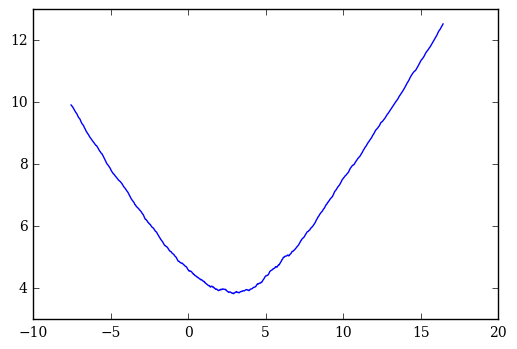

In [46]:
from scipy.interpolate import interp1d
interp_sig = interp1d(x+avg_phase, sigs, bounds_error=False, fill_value=None)
sigma = interp_sig(5)
print np.amin(sigs)
print sigma
plt.plot(x+avg_phase,sigs)
plt.show()

In [47]:
int_tot= np.percentile(ints_tot, [32, 50, 68])
print int_tot

int_sig_tot = .5*((int_tot[1] - int_tot[0]) + (int_tot[2] - int_tot[1]))
print int_sig_tot

[-11.56556171  -8.96922688  -6.28066117]
2.64245026795


In [48]:
slope_tot= np.percentile(slopes_tot, [32, 50, 68])
print slope_tot

slope_sig_tot = .5*((slope_tot[1] - slope_tot[0]) + (slope_tot[2] - slope_tot[1]))
print slope_sig_tot

[ 10.16574746  10.76476692  11.34010412]
0.587178332845


In [49]:
popt2_tot_og, pcov2_tot_og = curve_fit(lin, phases_tot, EWs_tot, p0=None, sigma=errs_tot, absolute_sigma=True)
print popt2_tot_og[0], popt2_tot_og[1]

166.179872442 10.7660815922


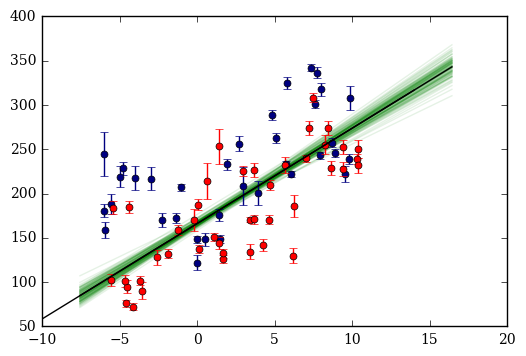

In [50]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="g", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')
plt.plot(x,popt2_tot_og[0] + popt2_tot_og[1]*x,'k')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [51]:
ints_late = []
ints_early = []
slopes_late = []
slopes_early = []
for i in range(1000):
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_late))
#     delta_EW = np.random.normal(loc=0, scale=err_late, size=len(EWs_late))
#     new_phases_late = phases_late + delta_phase
#     new_EWs_late = EWs_late + delta_EW
    
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_early))
#     delta_EW = np.random.normal(loc=0, scale=err_early, size=len(EWs_early))
#     new_phases_early = phases_early + delta_phase
#     new_EWs_early = EWs_early + delta_EW
    strap_list = np.random.random_sample(len(EWs_late_new))
    strap_list *= len(EWs_late_new)
    strap_list = strap_list.astype(int)
    new_phases_late = []
    new_EWs_late = []
    new_errs_late = []
    for i in strap_list:
        new_phases_late.append(phases_late_new[i])
        new_EWs_late.append(EWs_late_new[i])
        new_errs_late.append(err_late[i])
        
    strap_list = np.random.random_sample(len(EWs_early_new))
    strap_list *= len(EWs_early_new)
    strap_list = strap_list.astype(int)
    new_phases_early = []
    new_EWs_early = []
    new_errs_early = []
    for i in strap_list:
        new_phases_early.append(phases_early_new[i])
        new_EWs_early.append(EWs_early_new[i])
        new_errs_early.append(err_early[i])
    
    popt2_late, pcov2_late = curve_fit(lin, new_phases_late, new_EWs_late, p0=None, sigma=new_errs_late, absolute_sigma=True)
    popt2_early, pcov2_early = curve_fit(lin, new_phases_early, new_EWs_early, p0=None, sigma=new_errs_early, absolute_sigma=True)
    ints_late.append(popt2_late[0])
    ints_early.append(popt2_early[0])
    slopes_late.append(popt2_late[1])
    slopes_early.append(popt2_early[1])

In [52]:
int_late= np.percentile(ints_late, [32, 50, 68])
int_early= np.percentile(ints_early, [32, 50, 68])
print int_late
print int_early

int_sig_late = .5*((int_late[1] - int_late[0]) + (int_late[2] - int_late[1]))
int_sig_early = .5*((int_early[1] - int_early[0]) + (int_early[2] - int_early[1]))
print int_sig_late
print int_sig_early
# print sort_ints_late_low, sort_ints_late_up, sort_ints_early_low, sort_ints_early_up

[-15.07559327 -11.13546838  -7.16597166]
[-8.81739828 -6.26825383 -3.64260756]
3.95481080346
2.58739535594


In [53]:
slope_late= np.percentile(slopes_late, [32, 50, 68])
slope_early= np.percentile(slopes_early, [32, 50, 68])
print slope_late
print slope_early

slope_sig_late = .5*((slope_late[1] - slope_late[0]) + (slope_late[2] - slope_late[1]))
slope_sig_early = .5*((slope_early[1] - slope_early[0]) + (slope_early[2] - slope_early[1]))
print slope_sig_late
print slope_sig_early

[ 7.52713996  8.27590946  9.05979954]
[ 10.06796427  10.63161187  11.20553478]
0.766329787614
0.568785254731


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2002hw 1 darkblue 1.44
2007bd 2 limegreen 1.3
2005am 3 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 11 limegreen 1.23
2006bq 1 red 1.29
1994d 11 red 1.37
2002dj 4 darkred 1.19
2008hv 2 red 1.13369017264
2004gs 1 red 1.41
2005w 1 red 1.22957865079
2005cf 4 red 1.1
2006ej 2 red 1.26659174257
1996x 4 darkred 1.26
1998dx 1 darkred 1.32
2005ki 1 red 1.41
2003ch 1 red 1.22
2006ef 1 red 1.20119166548
2005el 6 red 1.27
2002he 3 darkred 1.44


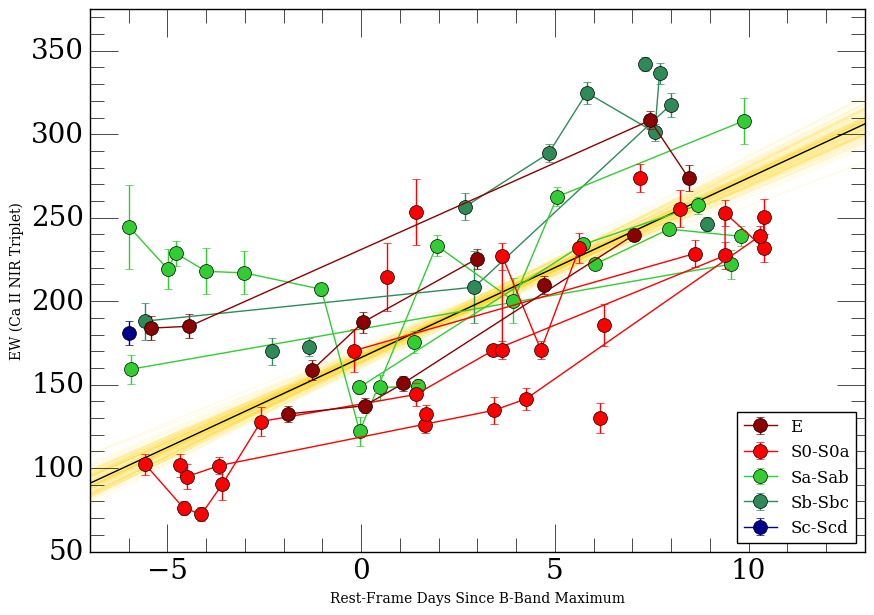

In [54]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')

E = []
S0_S0a = []

Sa_Sab = []
Sb_Sbc = []
Sc_Scd = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=11:
        Sa_Sab.append([resids,resid_errs])
        if len(Sa_Sab) == 1:
            lb = 'Sa-Sab'
        else:
            lb = ''
    elif 12<= morph <=13:
        Sb_Sbc.append([resids,resid_errs])
        if len(Sb_Sbc) == 1:
            lb = 'Sb-Sbc'
        else:
            lb = ''
    elif 14<= morph <=15:
        Sc_Scd.append([resids,resid_errs])
        if len(Sc_Scd) == 1:
            lb = 'Sc-Scd'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=7:
        E.append([resids,resid_errs])
        if len(E) == 1:
            lb = 'E'
        else:
            lb = ''
    elif 8<= morph <=9:
        S0_S0a.append([resids,resid_errs])
        if len(S0_S0a) == 1:
            lb = 'S0-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1)
plt.xlim(-7,13)
plt.ylim(50,375)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [55]:
E_avgs = []
E_errs = []
for i, e in enumerate(E):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    E_avgs.append(avg)
    E_errs.append(err)
    print avg, err
print 

S0_S0a_avgs = []
S0_S0a_errs = []
for i, e in enumerate(S0_S0a):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    S0_S0a_avgs.append(avg)
    S0_S0a_errs.append(err)
    print avg, err
print 

Sa_Sab_avgs = []
Sa_Sab_errs = []
for i, e in enumerate(Sa_Sab):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sa_Sab_avgs.append(avg)
    Sa_Sab_errs.append(err)
    print avg, err
print 

Sb_Sbc_avgs = []
Sb_Sbc_errs = []
for i, e in enumerate(Sb_Sbc):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sb_Sbc_avgs.append(avg)
    Sb_Sbc_errs.append(err)
    print avg, err
print 

Sc_Scd_avgs = []
Sc_Scd_errs = []
for i, e in enumerate(Sc_Scd):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sc_Scd_avgs.append(avg)
    Sc_Scd_errs.append(err)
    print avg, err

55.2190172701 4.94371479409
-18.1947353661 3.31310723712
-7.06521776533 6.92801942711
17.9136044677 4.34990381766

30.0532913983 9.83506899718
-30.9182747438 3.03136488974
-55.0027012224 4.54911974279
71.8255078817 20.1972181242
41.0805936076 20.9111788171
-13.4772474562 4.12713978808
-12.1568502534 8.44176736553
0.580718106119 12.6738706568
-102.408873332 10.2941946106
-47.8413992726 13.5097123009
-39.918268305 3.82560369201

-5.21575480378 7.75922164492
5.03832283596 8.34684069451
-16.8502443892 4.36615146028
-28.1502154093 5.23007144441
-4.5777201446 3.89575508868
60.4313181501 4.2248817262

20.9656392668 7.67321196954
-16.079202776 7.95655414151
73.6732973979 3.61884393919
28.4792982298 9.94247972137
52.6742920482 9.22984067203
97.0148729296 6.95141007231

79.1260620279 11.2286636523


In [56]:
print 'E:', np.average(E_avgs), np.sqrt(np.sum(np.asarray(E_errs)**2.))/len(E_avgs)
print 'S0_S0a:', np.average(S0_S0a_avgs), np.sqrt(np.sum(np.asarray(S0_S0a_errs)**2.))/len(S0_S0a_avgs)
print 'Sa_Sab:', np.average(Sa_Sab_avgs), np.sqrt(np.sum(np.asarray(Sa_Sab_errs)**2.))/len(Sa_Sab_avgs)
print 'Sb_Sbc:', np.average(Sb_Sbc_avgs), np.sqrt(np.sum(np.asarray(Sb_Sbc_errs)**2.))/len(Sb_Sbc_avgs)
print 'Sc_Scd:', np.average(Sc_Scd_avgs), np.sqrt(np.sum(np.asarray(Sc_Scd_errs)**2.))/len(Sc_Scd_avgs)

E: 11.9681671516 2.52903281828
S0_S0a: -14.3803185084 3.54878514242
Sa_Sab: 1.77928437321 2.41130859651
Sb_Sbc: 42.7880328494 3.19568255197
Sc_Scd: 79.1260620279 11.2286636523


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2002hw 1 darkblue 1.44
2007bd 2 limegreen 1.3
2005am 3 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 11 limegreen 1.23
2006bq 1 red 1.29
1994d 11 red 1.37
2002dj 4 darkred 1.19
2008hv 2 red 1.13369017264
2004gs 1 red 1.41
2005w 1 red 1.22957865079
2005cf 4 red 1.1
2006ej 2 red 1.26659174257
1996x 4 darkred 1.26
1998dx 1 darkred 1.32
2005ki 1 red 1.41
2003ch 1 red 1.22
2006ef 1 red 1.20119166548
2005el 6 red 1.27
2002he 3 darkred 1.44


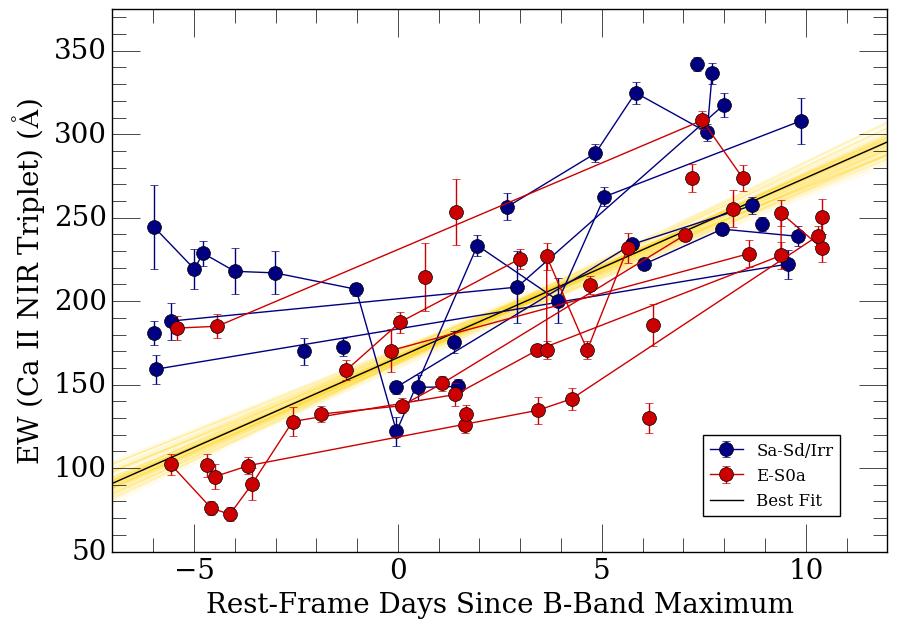

In [57]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum", fontsize=20)
plt.ylabel("EW (Ca II NIR Triplet) ($\mathrm{\AA}$)", fontsize=20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k', label='Best Fit')

late_resids = []
early_resids = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=18:
        late_resids.append([resids,resid_errs])
        if len(late_resids) == 1:
            lb = 'Sa-Sd/Irr'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#000080', label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=9:
        early_resids.append([resids,resid_errs])
        if len(early_resids) == 1:
            lb = 'E-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#cc0000', label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1, bbox_to_anchor=(0.5, 0.05, 0.45, 0.5))
plt.xlim(-7,12)
plt.ylim(50,375)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_2bins.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [58]:
early_avgs = []
early_errs = []
for i, e in enumerate(early_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    early_avgs.append(avg)
    early_errs.append(err)
    print avg, err
print 

late_avgs = []
late_errs = []
for i, e in enumerate(late_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    late_avgs.append(avg)
    late_errs.append(err)
    print avg, err
print 

30.0532913983 9.83506899718
-30.9182747438 3.03136488974
55.2190172701 4.94371479409
-55.0027012224 4.54911974279
71.8255078817 20.1972181242
41.0805936076 20.9111788171
-13.4772474562 4.12713978808
-12.1568502534 8.44176736553
-18.1947353661 3.31310723712
-7.06521776533 6.92801942711
0.580718106119 12.6738706568
-102.408873332 10.2941946106
-47.8413992726 13.5097123009
-39.918268305 3.82560369201
17.9136044677 4.34990381766

20.9656392668 7.67321196954
-5.21575480378 7.75922164492
79.1260620279 11.2286636523
5.03832283596 8.34684069451
-16.8502443892 4.36615146028
-16.079202776 7.95655414151
73.6732973979 3.61884393919
28.4792982298 9.94247972137
-28.1502154093 5.23007144441
52.6742920482 9.22984067203
-4.5777201446 3.89575508868
97.0148729296 6.95141007231
60.4313181501 4.2248817262



In [59]:
print 'E-S0a:', np.average(late_avgs), np.std(late_avgs), np.sqrt(np.sum(np.asarray(late_errs)**2.))/len(late_avgs)
print 'Sa-Scd:', np.average(early_avgs), np.std(early_avgs), np.sqrt(np.sum(np.asarray(early_errs)**2.))/len(early_avgs)
print (np.average(late_avgs) - np.average(early_avgs))/np.sqrt((np.std(late_avgs)**2) + np.std(early_avgs)**2)

E-S0a: 26.6561511818 40.1430356268 2.0396187539
Sa-Scd: -7.35405566572 44.2495454654 2.68840729915
0.569254479999


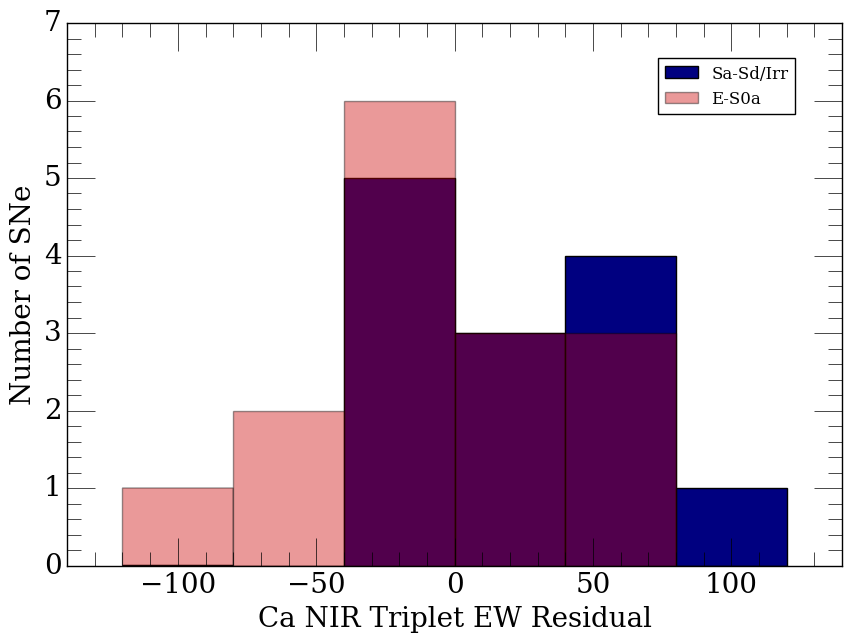

In [60]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Ca NIR Triplet EW Residual", fontsize = 20)
plt.ylabel("Number of SNe", fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.hist(late_avgs, color = '#000080', bins=range(-120, 140, 40), label='Sa-Sd/Irr')
plt.hist(early_avgs, color = '#cc0000', alpha=.4, bins=range(-120, 140, 40), label='E-S0a')
plt.legend(loc=1, bbox_to_anchor=(0.5, 0.45, 0.45, 0.5))
plt.ylim(0,7)
plt.xlim(-140,140)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_hist.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [61]:
from scipy import stats
stats.ks_2samp(early_avgs, late_avgs)

Ks_2sampResult(statistic=0.3692307692307692, pvalue=0.23522871838599244)

In [189]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    inv_sigma2 = 1.0/(yerr**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

# def lnlike_const_slope(theta, x, y, yerr, m):
#     b, lnf = theta
#     model = m*x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
# #     inv_sigma2 = 1.0/(yerr**2)
#     return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

In [190]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
nll_c = lambda *args: -lnlike_const_slope(*args)
result_late = op.minimize(nll, [10,0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
m_ml_late, b_ml_late, lnf_ml_late = result_late["x"]
print m_ml_late, b_ml_late, np.exp(lnf_ml_late)

result_early = op.minimize(nll, [10, 0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))
m_ml_early, b_ml_early, lnf_ml_early = result_early["x"]
print m_ml_early, b_ml_early, np.exp(lnf_ml_early)

# print

#const slope
# m_c = 7
# result_late_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late), m_c))
# b_ml_late_c, lnf_ml_late_c = result_late_c["x"]
# print b_ml_late_c, np.exp(lnf_ml_late_c)

# result_early_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early), m_c))
# b_ml_early_c, lnf_ml_early_c = result_early_c["x"]
# print b_ml_early_c, np.exp(lnf_ml_early_c)

8.04830325198 -9.5927893824 1.6487212707
11.1033951541 -52.4067824055 1.6487212707


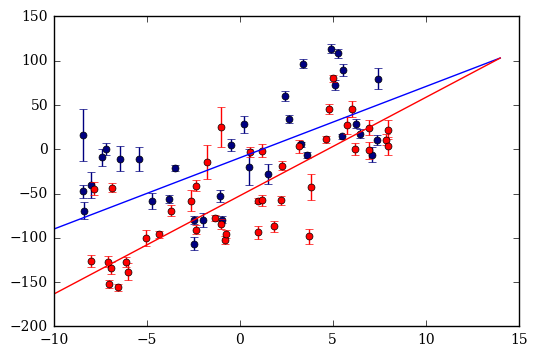

In [191]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
plt.plot(x,m_ml_late*x + b_ml_late,'b')
plt.plot(x,m_ml_early*x + b_ml_early,'r')

# plt.plot(x,m_c*x + b_ml_late_c,'b')
# plt.plot(x,m_c*x + b_ml_early_c,'r')

# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + slope*x, sort_ints_late_up + slope*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + slope*x, sort_ints_early_up + slope*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [192]:
import emcee
def lnprior(theta):
    m, b, lnf = theta
#     if 0.0 < m < 20. and 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
    if 0.0 < m < 20. and -100.0 < b < 100.0 and -10.0 < lnf < 2.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

# def lnprior_c(theta):
#     b, lnf = theta
#     #7.01263387516
#     if 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
# #     if 7.01 < m < 7.02 and 0.0 < b < 300.0 and -10.0 < lnf < 1.0:
# #         return 0.0
#     return -np.inf

# def lnprob_c(theta, x, y, yerr, m):
#     lp = lnprior_c(theta)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + lnlike_const_slope(theta, x, y, yerr, m)

In [193]:
ndim, nwalkers = 3, 100
pos_late = [result_late["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
pos_early = [result_early["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# ndim_c, nwalkers = 2, 100
# pos_late_c = [result_late_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]
# pos_early_c = [result_early_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]

In [194]:
sampler_late = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
sampler_early = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))

sampler_late.run_mcmc(pos_late, 500)
sampler_early.run_mcmc(pos_early, 500)


# sampler_late_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_late_new), np.asarray(EWs_late), np.asarray(err_late), m_c))
# sampler_early_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_early_new), np.asarray(EWs_early), np.asarray(err_early), m_c))

# sampler_late_c.run_mcmc(pos_late_c, 500)
# sampler_early_c.run_mcmc(pos_early_c, 500)

(array([[ 11.20879213, -51.42790167,  -6.13298628],
        [ 10.44471956, -51.9278892 ,  -0.91558056],
        [ 11.49563149, -53.36764746,  -5.09890265],
        [ 11.28521062, -53.18544853,   1.642969  ],
        [ 10.53392133, -49.18153494,  -0.96080424],
        [ 10.55512847, -53.75261877,  -3.46187951],
        [ 11.4755828 , -52.1392925 ,  -9.34354234],
        [ 10.52777088, -52.62984717,  -1.42479546],
        [ 10.33022838, -54.26587056,   1.80308445],
        [ 11.08523918, -53.20814085,  -7.90619969],
        [ 10.8957014 , -55.24934281,  -0.32142322],
        [ 11.3841625 , -51.52165404,  -2.52220801],
        [ 10.98617871, -52.64544612,  -8.99452124],
        [ 11.47623005, -55.51009293,  -5.37887121],
        [ 11.00223076, -47.72638195,   1.38155866],
        [ 10.46504951, -53.33038474,  -8.72559096],
        [ 10.59738517, -51.16382929,   1.57216293],
        [ 10.82908988, -52.5172777 ,  -4.17099394],
        [ 11.40451113, -55.12873041,  -7.00758483],
        [ 11

In [195]:
samples_late = sampler_late.chain[:, 50:, :].reshape((-1, ndim))
samples_early = sampler_early.chain[:, 50:, :].reshape((-1, ndim))

samples_late[:, 2] = np.exp(samples_late[:, 2])
m_mcmc_late, b_mcmc_late, f_mcmc_late = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_late, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_late, b_mcmc_late, f_mcmc_late

samples_early[:, 2] = np.exp(samples_early[:, 2])
m_mcmc_early, b_mcmc_early, f_mcmc_early = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_early, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_early, b_mcmc_early, f_mcmc_early

# print
# #constant slope
# samples_late_c = sampler_late_c.chain[:, 50:, :].reshape((-1, ndim_c))
# samples_early_c = sampler_early_c.chain[:, 50:, :].reshape((-1, ndim_c))

# samples_late_c[:, 1] = np.exp(samples_late_c[:, 1])
# b_mcmc_late_c, f_mcmc_late_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                             zip(*np.percentile(samples_late_c, [32, 50, 68],
#                                             axis=0)))
# print b_mcmc_late_c, f_mcmc_late_c

# samples_early_c[:, 1] = np.exp(samples_early_c[:, 1])
# b_mcmc_early_c, f_mcmc_early_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                                          zip(*np.percentile(samples_early_c, [32, 50, 68],
#                                                             axis=0)))
# print b_mcmc_early_c, f_mcmc_early_c

(8.0170011460049171, 0.33680698054835467, 0.34604674490826692) (-9.6730243027198117, 1.4371665922362755, 1.4169836130758338) (0.026422663857862051, 0.19743985076135298, 0.023787141301235638)
(11.083739028422519, 0.28314289912121815, 0.28816487639262434) (-52.337117754447547, 1.3125554888637794, 1.2769214413620347) (0.013628810415147293, 0.10875989462916313, 0.011813847345701114)


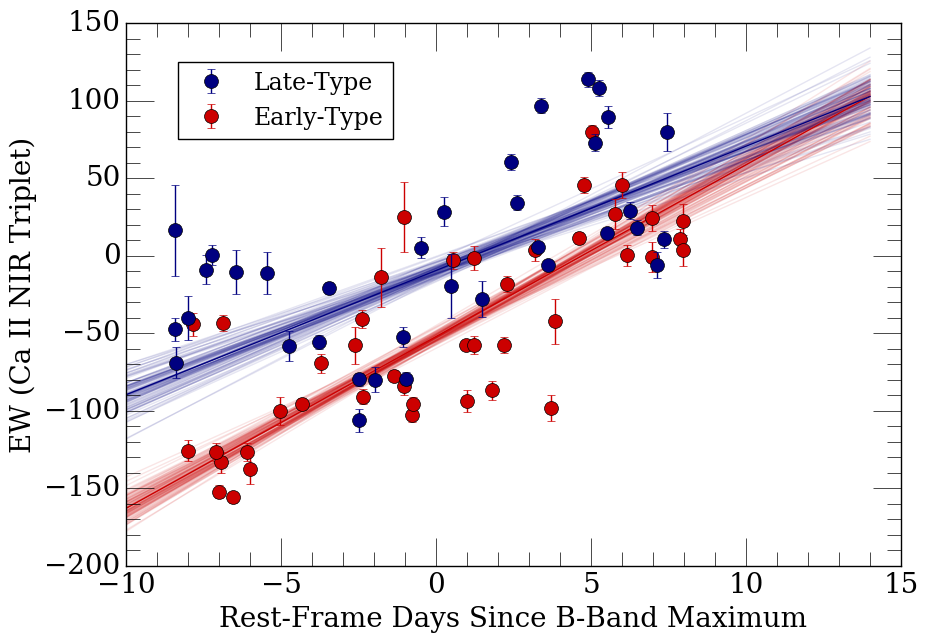

In [196]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for m, b, lnf in samples_late[np.random.randint(len(samples_late), size=100)]:
    plt.plot(x, m*x+b, color="#000080", alpha=0.1, zorder=-1)
for m, b, lnf in samples_early[np.random.randint(len(samples_early), size=100)]:
    plt.plot(x, m*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_mcmc_late[0]*x + b_mcmc_late[0],'#000080', zorder=-.5)
plt.plot(x,m_mcmc_early[0]*x + b_mcmc_early[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

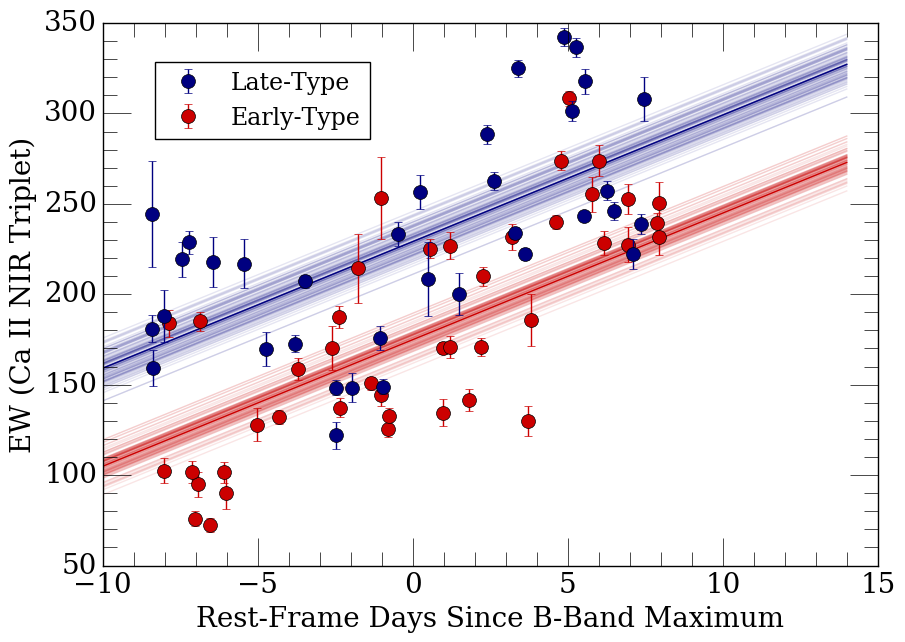

In [119]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for b, lnf in samples_late_c[np.random.randint(len(samples_late_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#000080", alpha=0.1, zorder=-1)
for b, lnf in samples_early_c[np.random.randint(len(samples_early_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_c*x + b_mcmc_late_c[0],'#000080', zorder=-.5)
plt.plot(x,m_c*x + b_mcmc_early_c[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Max-High dm15 Matched

In [14]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [15]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
4 questionable spectra removed 54 spectra left
5 Peculiar Ias removed 49 spectra left
39 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm

-0.162779726842
1.34276533441
0.344992531562
1.34267830931


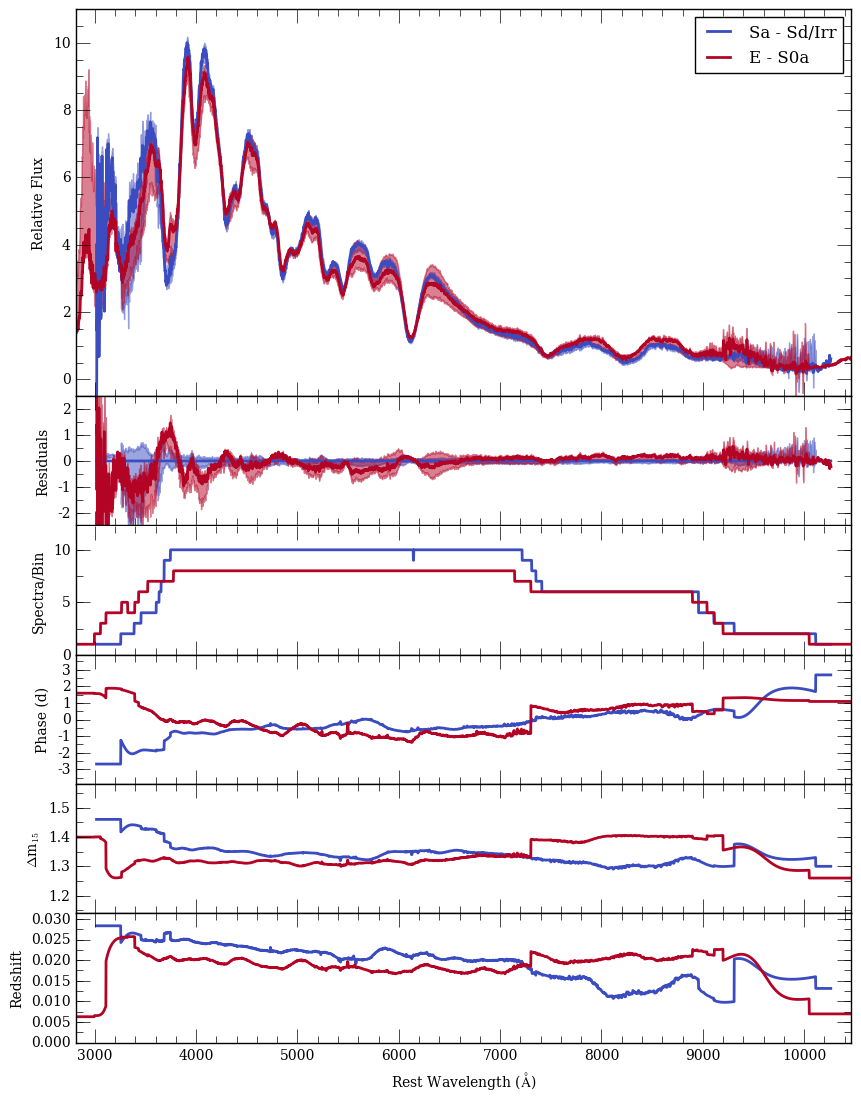

In [16]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [17]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [18]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
1 questionable spectra removed 29 spectra left
0 Peculiar Ias removed 29 spectra left
26 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
17 spectra may have telluric contamination
17 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
0 questionable spectra removed 11 spectra left
0 Peculia

6.32394186246
1.02985627134
6.83483977494
1.06079003646


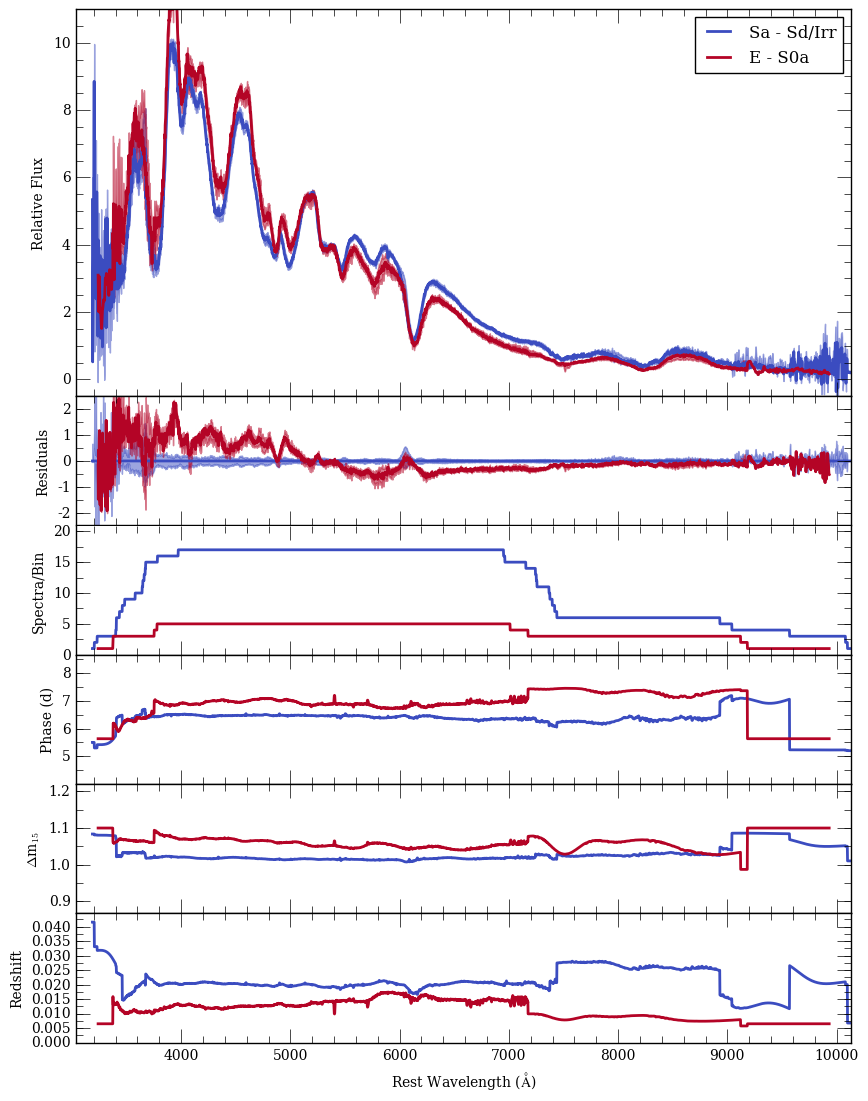

In [19]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [20]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [21]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 26 spectra left
0 Peculiar Ias removed 26 spectra left
21 spectra with host corrections
172 questionable files currently ignored
8 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
8 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionable fi

6.92800519464
1.36045603157
7.58052346057
1.38911758851


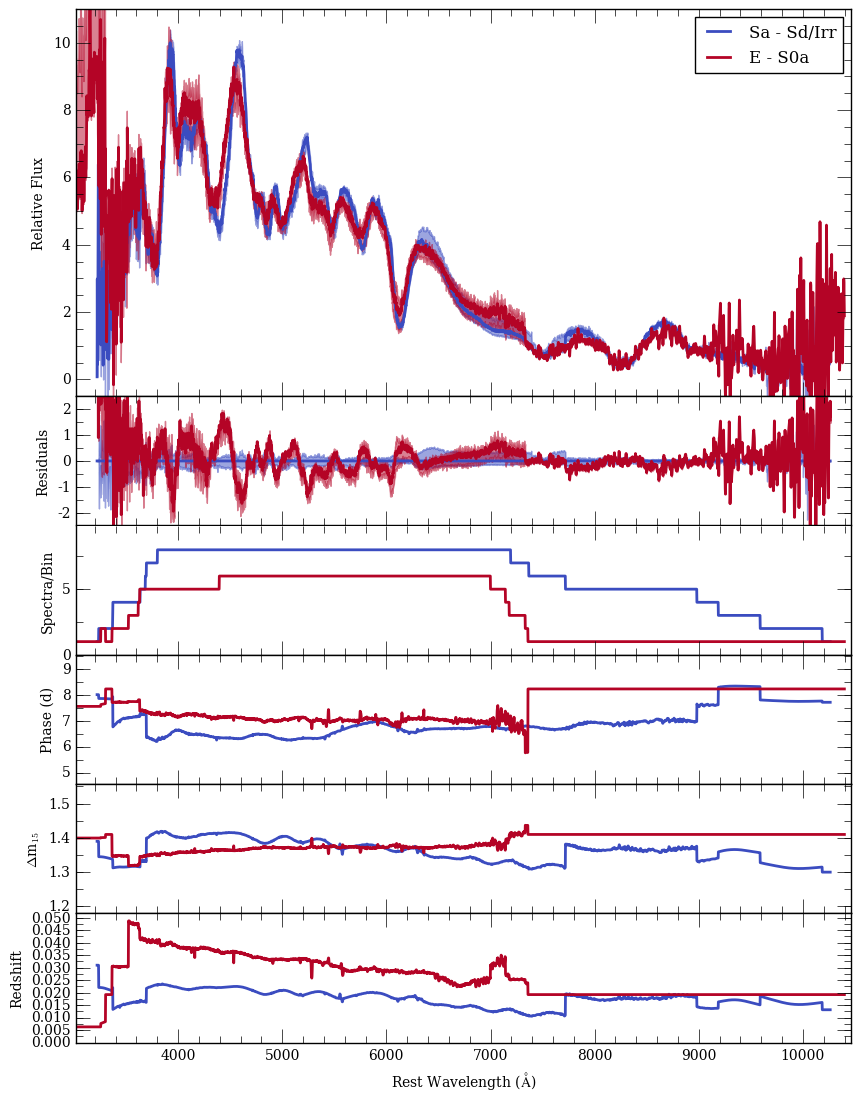

In [22]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [23]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [24]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
2 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
46 spectra with host corrections
172 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603

-6.80056333422
1.03873962341
-6.46939975844
1.01990214877


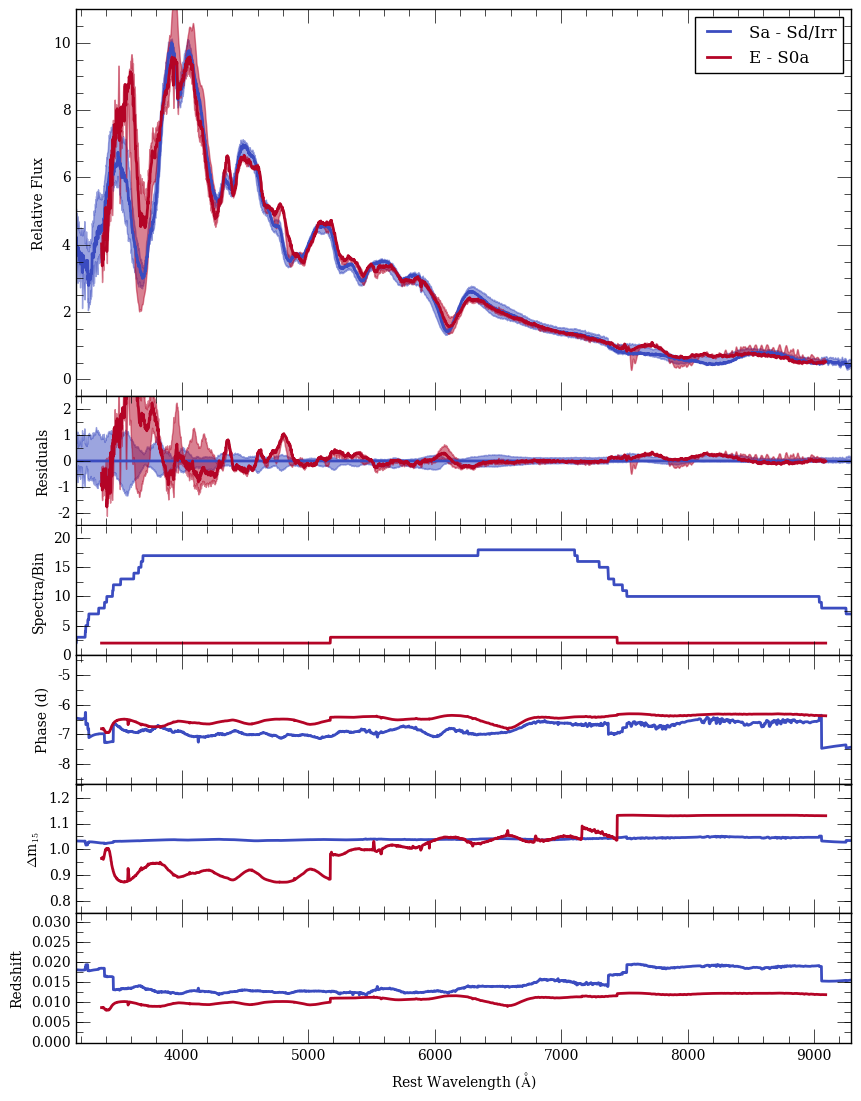

In [25]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_m1week')

In [26]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [27]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
172 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
9 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionabl

-5.82422884136
1.41953586444
-5.81620661784
1.41581278456


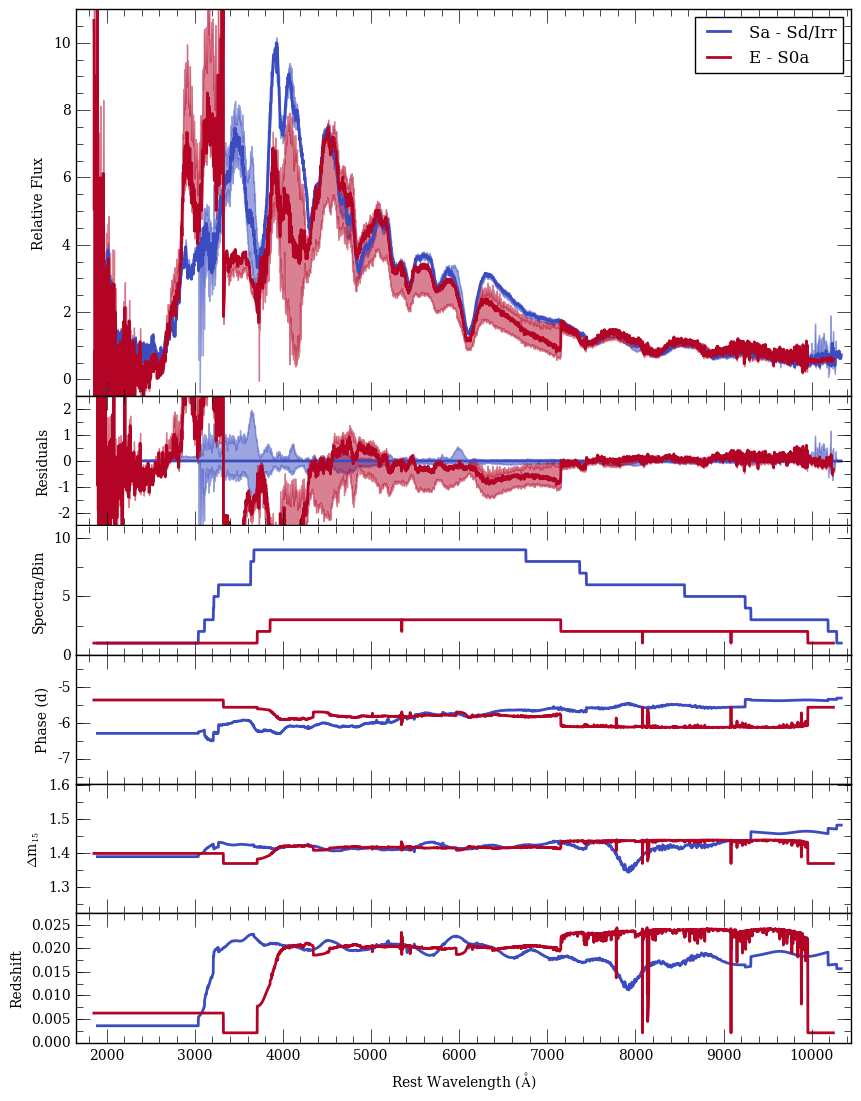

In [29]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_m1week')